In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
import time
import datetime

In [50]:
display(HTML('<h3 style="text-align: center;font-weight: normal;">========  COVID-19 Statistics Analysis  ==========</h3><p style="text-align: left;font-weight: normal;"> <strong>- COVID-19 relation with Gender and Age.<br>- Symptoms statistics. Asymptomatic and Hospital Duration statistics. <br>- COVID-19 relations with Temperature and Life Expectancy. <br>- COVID-19 Countries Statistics: <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries where the next Outbreak might be.  <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries Need to keep Control(current procedure) to dodge the outbreak. <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries Manage to Control The outbreak (Flatten the curve) in current procedures. </strong> </p>'))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  ============= <br></h3>'))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Summary: </strong> (more details on graphs below) <br><br></h3>'))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries Losing Control of the Outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(losing_control_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries Manage more Control of the Outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(more_control_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  ============= <br></h3>'))  
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries where the next Outbreak might be:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(next_possible_outbreak_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries Need to keep Control(current procedure) to dodge the outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(countries_near_controling)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries Manage to Control The out break (Flatten the curve) in current procedures:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br><br><br><br> </p>'%(countries_controled_the_outbreak)))



In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
print('Files Used:')
import os
for dirname, _, filenames in os.walk('./novel-corona-virus-2019-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Files Used:
./novel-corona-virus-2019-dataset\country_population.csv
./novel-corona-virus-2019-dataset\COVID19_line_list_data.csv
./novel-corona-virus-2019-dataset\COVID19_line_list_data2.csv
./novel-corona-virus-2019-dataset\COVID19_open_line_list.csv
./novel-corona-virus-2019-dataset\covid_19_data.csv
./novel-corona-virus-2019-dataset\Curfews_and_lockdowns_countries_dates.csv
./novel-corona-virus-2019-dataset\fertility_rate.csv
./novel-corona-virus-2019-dataset\life_expectancy.csv
./novel-corona-virus-2019-dataset\novel-corona-virus-2019-dataset(1).zip
./novel-corona-virus-2019-dataset\temperature _monthly_data_per_country.csv
./novel-corona-virus-2019-dataset\time_series_covid_19_confirmed.csv
./novel-corona-virus-2019-dataset\time_series_covid_19_confirmed_US.csv
./novel-corona-virus-2019-dataset\time_series_covid_19_deaths.csv
./novel-corona-virus-2019-dataset\time_series_covid_19_deaths_US.csv
./novel-corona-virus-2019-dataset\time_series_covid_19_recovered.csv
./novel-corona-vir

In [3]:
data_sum = pd.read_csv('./novel-corona-virus-2019-dataset/covid_19_data.csv')
data_det = pd.read_csv('./novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
data_population = pd.read_csv('./novel-corona-virus-2019-dataset/country_population.csv')
data_fertility = pd.read_csv('./novel-corona-virus-2019-dataset/fertility_rate.csv')
data_life_exp = pd.read_csv('./novel-corona-virus-2019-dataset/life_expectancy.csv')
data_temprature = pd.read_csv('./novel-corona-virus-2019-dataset/temperature _monthly_data_per_country.csv')
data_curefews_dates = pd.read_csv('./novel-corona-virus-2019-dataset/Curfews_and_lockdowns_countries_dates.csv')

In [4]:
#prepare covid_19_data.csv data table
#group data based on country and date
data_s = data_sum.groupby(['ObservationDate','Country/Region']).sum()
data_s=data_s.reset_index(['ObservationDate','Country/Region'])
#correct ObservationDate type and create new columns if needed 
data_s['ObservationDate'] = pd.to_datetime(data_s['ObservationDate'])
data_s['day'] = data_s['ObservationDate'].dt.day
data_s['month'] = data_s['ObservationDate'].dt.month
data_s['Active']=data_s['Confirmed']-(data_s['Deaths']+data_s['Recovered'])
data_s['R+D']=data_s['Recovered']+data_s['Deaths']
#create a new table grouped by counties with final comulative cases 
data_c_p = data_s.groupby('Country/Region').max().reset_index(['Country/Region'])
print('COVID-19_data.csv after preparing info:\n')
data_s.info()

COVID-19_data.csv after preparing info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11670 entries, 0 to 11669
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  11670 non-null  datetime64[ns]
 1   Country/Region   11670 non-null  object        
 2   SNo              11670 non-null  int64         
 3   Confirmed        11670 non-null  float64       
 4   Deaths           11670 non-null  float64       
 5   Recovered        11670 non-null  float64       
 6   day              11670 non-null  int64         
 7   month            11670 non-null  int64         
 8   Active           11670 non-null  float64       
 9   R+D              11670 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 911.8+ KB


In [5]:
#prepare COVID19_line_list_data.csv data table
data_d=data_det.copy()
#drop empty and no use column
data_d.drop(columns=['visiting Wuhan','from Wuhan','If_onset_approximated','source','link','Unnamed: 3', 'Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'],inplace=True)#
#fill death and recovered dates to report date(keep death and recovered as 1 or 0)
for i,x in enumerate(data_d['death']):
    if x=='0':
        z=x
    elif x=='1':
        z=x
    else:
        data_d['reporting date'][i]=data_d['death'][i]
        data_d['death'][i]='1'
for i,x in enumerate(data_d['recovered']):
    if x=='0':
        z=x
    elif x=='1':
        z=x
    else:
        data_d['reporting date'][i]=data_d['recovered'][i]
        data_d['recovered'][i]='1'
data_d['death'] = np.int64(data_d['death'])
data_d['recovered'] = np.int64(data_d['recovered'])
#estemate average exposure date then calculate Asymptom, hospital, and whole operation till output duration 
data_d['symptom_onset'][data_d['symptom_onset']=='male']=0 #extra sheet has this wrong value
data_d['reporting date'] = pd.to_datetime(data_d['reporting date'])
data_d['symptom_onset'] = pd.to_datetime(data_d['symptom_onset'])
data_d['hosp_visit_date'] = pd.to_datetime(data_d['hosp_visit_date'])
data_d['exposure_start'] = pd.to_datetime(data_d['exposure_start'])
data_d['exposure_end'] = pd.to_datetime(data_d['exposure_end'])
data_d['exposure']=data_d['exposure_end'] - np.timedelta64((data_d['exposure_end']-data_d['exposure_start']).mean(), 'D')
data_d['exposure'] = pd.to_datetime(data_d['exposure'])
data_d['Asymptom_duration']=data_d['symptom_onset'] - data_d['exposure']
data_d['Asymptom_duration'] = data_d['Asymptom_duration']/ np.timedelta64(1, 'D')
data_d['hospital_duration']=data_d['reporting date'] - data_d['hosp_visit_date']
data_d['hospital_duration'] = data_d['hospital_duration']/ np.timedelta64(1, 'D')
data_d['op_duration']=data_d['reporting date'] - data_d['exposure']
data_d['op_duration'] = data_d['op_duration']/ np.timedelta64(1, 'D')
#fill in empty values with 0 for numerical column and empty for object column
for x in ['Asymptom_duration','hospital_duration','op_duration','age','case_in_country']:
    data_d[x].fillna(0,inplace=True)
for x in ['summary','gender','symptom']:
    data_d[x].fillna('empty',inplace=True)
#drop not used anymore columns
data_d.drop(columns=['reporting date','symptom_onset','hosp_visit_date','exposure_start','exposure_end'],inplace=True)
#delete some irregular values (negative in below columns)
y=[]
for x in ['Asymptom_duration','hospital_duration','op_duration']:
    y.append(data_d[x].loc[data_d['id'][data_d[x]<0].index,].values)
    data_d[x].loc[data_d['id'][data_d[x]<0].index,] = data_d[x].loc[data_d['id'][data_d[x]<0].index,].replace(to_replace=y,value=0)
    y=[]

#categories values in groups and create new columns 
data_d['age_category']=data_d['age']
data_d['Asymptom_duration_cat']=data_d['Asymptom_duration']
data_d['hospital_duration_cat']=data_d['hospital_duration']
data_d['op_duration_cat']=data_d['op_duration']
for i,x in enumerate(data_d['age']):
    if x > 59:
        data_d['age_category'].loc[i]='more_than_60'
    elif x > 39:
        data_d['age_category'].loc[i]='between_40_&_60'
    elif x > 19:
        data_d['age_category'].loc[i]='between_20_&_40'
    else:
        data_d['age_category'].loc[i]='less_than_20'
for i,x in enumerate(data_d['Asymptom_duration']):
    if x <= 0:
        data_d['Asymptom_duration_cat'].loc[i]='empty'
    elif x < 8:
        data_d['Asymptom_duration_cat'].loc[i]='Less than 7 days'
    elif x < 15:
        data_d['Asymptom_duration_cat'].loc[i]='Between 7 & 14 days'
    elif x < 22:
        data_d['Asymptom_duration_cat'].loc[i]='Between 14 & 21 days'
    else:
        data_d['Asymptom_duration_cat'].loc[i]='More than 21 days'
for i,x in enumerate(data_d['hospital_duration']):
    if x <= 0:
        data_d['hospital_duration_cat'].loc[i]='empty'
    elif x < 8:
        data_d['hospital_duration_cat'].loc[i]='Less than 7 days'
    elif x < 15:
        data_d['hospital_duration_cat'].loc[i]='Between 7 & 14 days'
    elif x < 22:
        data_d['hospital_duration_cat'].loc[i]='Between 14 & 21 days'
    else:
        data_d['hospital_duration_cat'].loc[i]='More than 21 days'
for i,x in enumerate(data_d['op_duration']):
    if x <= 0:
        data_d['op_duration_cat'].loc[i]='empty'
    elif x < 8:
        data_d['op_duration_cat'].loc[i]='Less than 7 days'
    elif x < 15:
        data_d['op_duration_cat'].loc[i]='Between 7 & 14 days'
    elif x < 22:
        data_d['op_duration_cat'].loc[i]='Between 14 & 21 days'
    else:
        data_d['op_duration_cat'].loc[i]='More than 21 days'

#create new dataframe for most repeated symptoms 
symptom = {}
for i,x in enumerate(data_d['symptom']):
    if x == 'empty':
        pass
    else:
        for f in data_d['symptom'].value_counts()[0:14].index:
            if x==f:
                symptom[i]=x
symptom = pd.DataFrame(symptom.values(),columns=['symptom'])

data_d['gender'][data_d['gender']=='20']='empty'

print('COVID-19_line_list_data.csv after preparing and modifying info:\n')
data_d.info()

COVID-19_line_list_data.csv after preparing and modifying info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1085 non-null   int64         
 1   case_in_country        1085 non-null   float64       
 2   summary                1085 non-null   object        
 3   location               1085 non-null   object        
 4   country                1085 non-null   object        
 5   gender                 1085 non-null   object        
 6   age                    1085 non-null   float64       
 7   death                  1085 non-null   int64         
 8   recovered              1085 non-null   int64         
 9   symptom                1085 non-null   object        
 10  exposure               341 non-null    datetime64[ns]
 11  Asymptom_duration      1085 non-null   float64       
 1

In [6]:
#connect covid-19 data_c_p data with added column to population statistics
data_c_p['Country/Region'][data_c_p['Country/Region']=='Mainland China']='China'
data_c_p['Country/Region'][data_c_p['Country/Region']=="US"]="United States"
data_c_p['Country/Region'][data_c_p['Country/Region']=="UK"]="United Kingdom"
data_c_p['Country/Region'][data_c_p['Country/Region']=='Azerbaijan']='Azerbaijan'
data_c_p['Country/Region'][data_c_p['Country/Region']=="Hong Kong"]="Hong Kong SAR, China"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Iran"]="Iran, Islamic Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Macau"]="Macao SAR, China"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Russia"]="Russian Federation"
data_c_p['Country/Region'][data_c_p['Country/Region']=="South Korea"]="Korea, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Syria"]="Syrian Arab Republic"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Venezuela"]="Venezuela, RB"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Yemen"]="Yemen, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Slovakia"]="Slovak Republic"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Saint Lucia"]="St. Lucia"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Saint Vincent and the Grenadines"]="St. Vincent and the Grenadines"
data_c_p['Country/Region'][data_c_p['Country/Region']=="North Macedonia"]="Macedonia, FYR"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Republic of the Congo"]="Congo, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="('St. Martin',)"]='St. Martin (French part)'
data_c_p['Country/Region'][data_c_p['Country/Region']=="Egypt"]='Egypt, Arab Rep.'

data_p = data_population[['Country Name','2016']].copy()
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_p['Country Name'].loc[data_p['Country Name']==x].values:
        y.append(data_p['2016'].loc[data_p['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['population'] = y
data_c_p['population'].fillna(0,inplace=True)

In [7]:
#connect covid-19 data_c_p data with added column to fertility statistics
data_f = data_fertility[['Country Name','2016']].copy()
data_f['2016'].fillna(0,inplace=True)
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_f['Country Name'].loc[data_f['Country Name']==x].values:
        y.append(data_f['2016'].loc[data_f['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['fertility_rate'] = y
data_c_p['fertility_rate'].fillna(0,inplace=True)

In [8]:
#connect covid-19 data_c_p data with added column to life_exp statistics
data_l = data_life_exp[['Country Name','2016']].copy()
data_l['2016'].fillna(0,inplace=True)
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_l['Country Name'].loc[data_l['Country Name']==x].values:
        y.append(data_l['2016'].loc[data_l['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['life_exp'] = y

In [9]:
#connect covid-19 data_c_p data with added column to first quarter mean tempreture statistics
#choose only first 4 months data from temperature _monthly_data_per_country.csv to calculate the mean
data_t = data_temprature[['Jan_Temp', 'Feb_temp', 'Mar_temp', 'Apr_Temp']].transpose(copy=True)
y=[]
for x in data_t.columns:
    y.append(data_t[x].mean())
    
#create new DataFrame to save country with its mean first quarter tempreture
data_te = pd.DataFrame()    
data_te['Country Name'] = data_temprature['ISO_3DIGIT']
data_te['first_quarter_temp']=y

#convert country code to name
y=[]
for i,x in enumerate(data_te['Country Name']):
    if x == data_population['Country Code'].loc[data_population['Country Code']==x].values:
        y.append(data_population['Country Name'].loc[data_population['Country Code']==x].values[0])
    else:
        y.append(0)
data_te['Country Name'] = y

#connect covid-19 data_c_p data with added column to first quarter mean tempreture statistics
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_te['Country Name'].loc[data_te['Country Name']==x].values:
        y.append(data_te['first_quarter_temp'].loc[data_te['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['first_quarter_temp'] = y

In [10]:
#add Curefews and Lockdown Start dates columns
data_curefew = data_curefews_dates[['Countries and territories','Start date']]
data_curefew.columns=['Countries', 'Start date']
data_curefew.dropna(inplace=True)
data_curefew.drop_duplicates(inplace=True)
data_curefew['Countries'][data_curefew['Countries']=='Russia']='Russian Federation'
data_curefew['Countries'][data_curefew['Countries']=='Venezuela']='Venezuela, RB'
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_curefew['Countries'].loc[data_curefew['Countries']==x].values:
        y.append(data_curefew['Start date'].loc[data_curefew['Countries']==x].values[0])
    else:
        y.append('NAT')
data_c_p['Curefew_date'] = y
data_c_p['Curefew_date'] = pd.to_datetime(data_c_p['Curefew_date'])
for i, x in enumerate(data_c_p['Curefew_date'].tolist()):
    if x.month > 4:
        data_c_p['Curefew_date'].loc[i]=pd.to_datetime('%s%s%s'%(x.year, x.day, x.month), format='%Y%m%d')
data_c_p['Curefew_date'].fillna(0,inplace=True)

print("COVID-19_data.csv groupby('Country/Region') and connect with life_exp, first quarter mean tempreture, and population statistics, plus to Curefews and Lockdown Start dates:\n")
data_c_p.info()

COVID-19_data.csv groupby('Country/Region') and connect with life_exp, first quarter mean tempreture, and population statistics, plus to Curefews and Lockdown Start dates:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Country/Region      222 non-null    object        
 1   ObservationDate     222 non-null    datetime64[ns]
 2   SNo                 222 non-null    int64         
 3   Confirmed           222 non-null    float64       
 4   Deaths              222 non-null    float64       
 5   Recovered           222 non-null    float64       
 6   day                 222 non-null    int64         
 7   month               222 non-null    int64         
 8   Active              222 non-null    float64       
 9   R+D                 222 non-null    float64       
 10  population          222 non-null    float64  

In [11]:
#create a growth_rate function to be used when needed
def growth_rate(data=None):
    x = []
    x.append(0)
    for i in range(data.shape[0]-1):
        a = data.iloc[i+1]-data.iloc[i]
        x.append(a/data.iloc[i])
        
    return np.array(x)

In [12]:
display(HTML('<h3 style="text-align: center;font-weight: normal;">========  COVID-19 Statistics Study  ==========</h3><p style="text-align: left;font-weight: normal;"> <strong>- COVID-19 relation with Gender and Age.<br>- Symptoms statistcs. Asymptoms and Hospital Duration statistics. <br>- COVID-19 relations with Tempreture and Life Expectency. <br>- COVID-19 Countires Statistics: <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries where the next Outbreak might be.  <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries Need to keep Control(current procedure) to dudge the outbreak <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries Manage to Control The out break in current procedure </strong> </p>'))

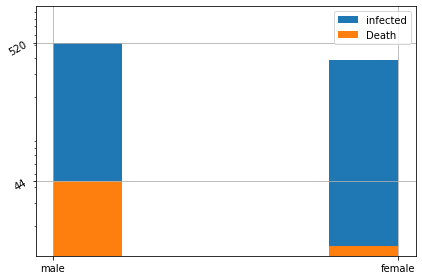

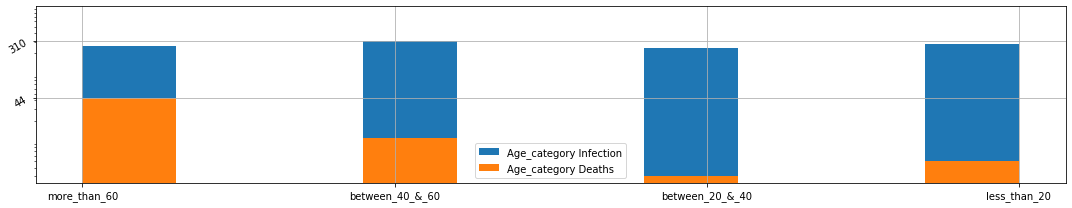

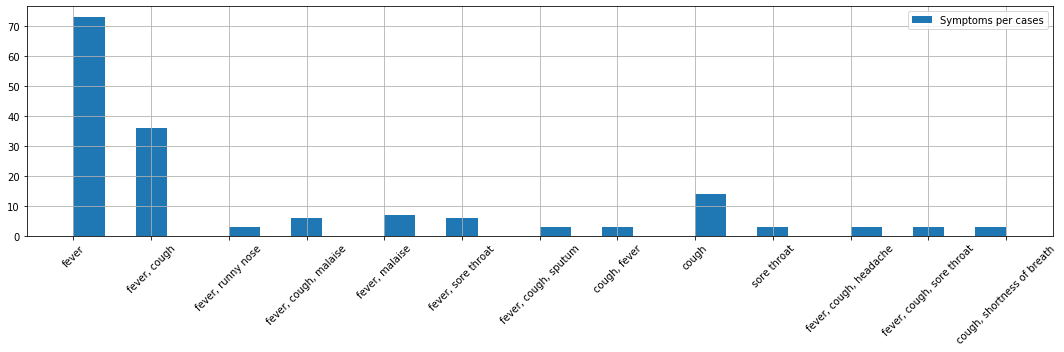

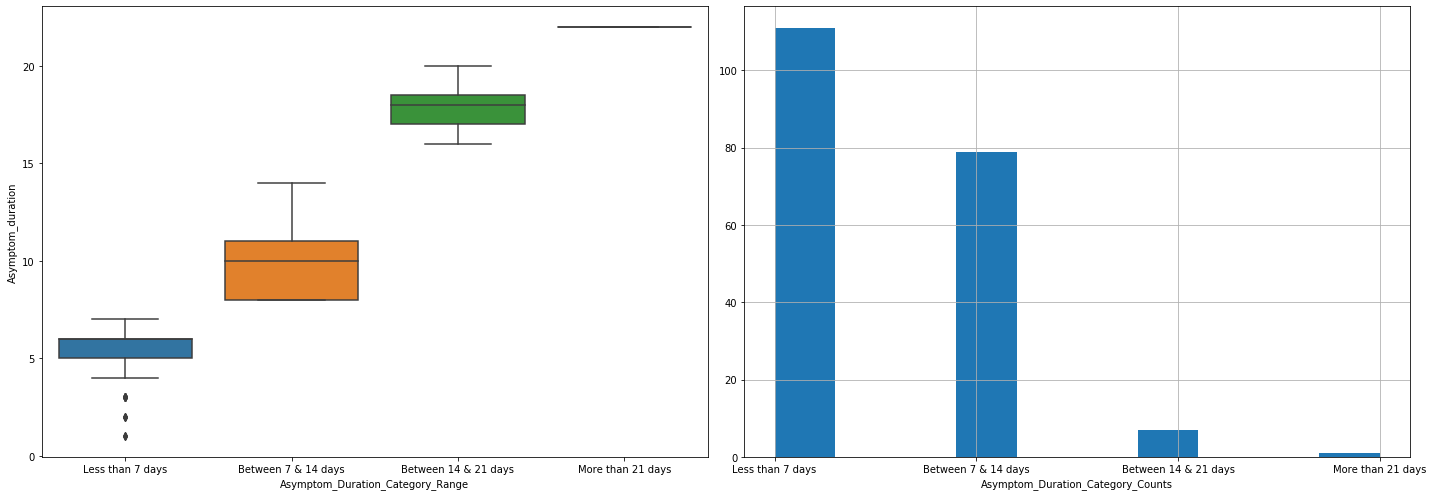

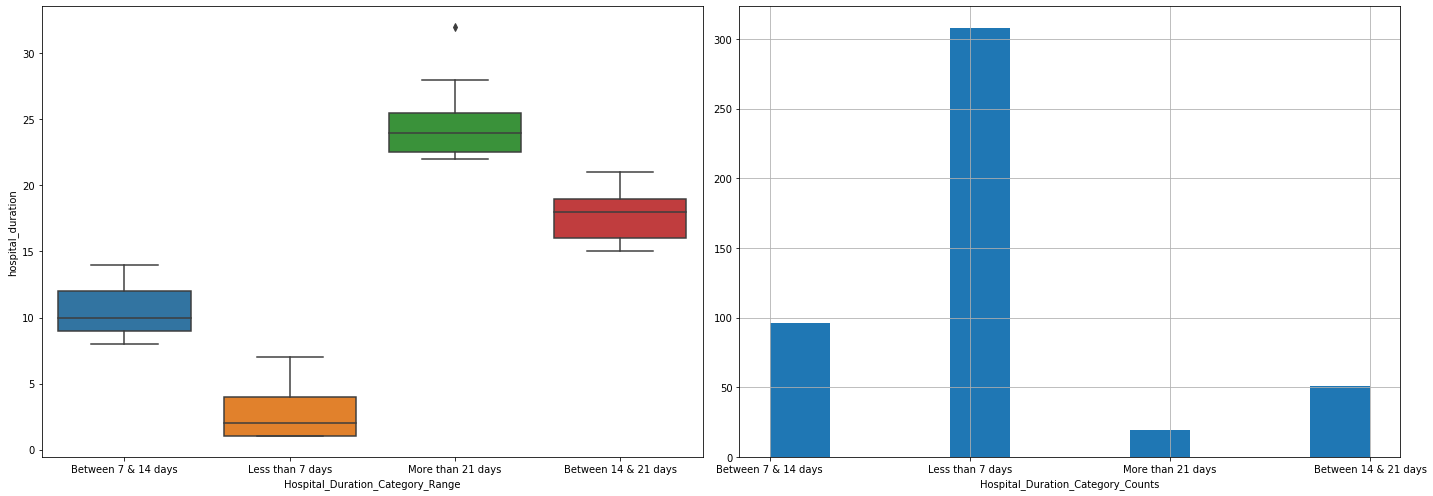

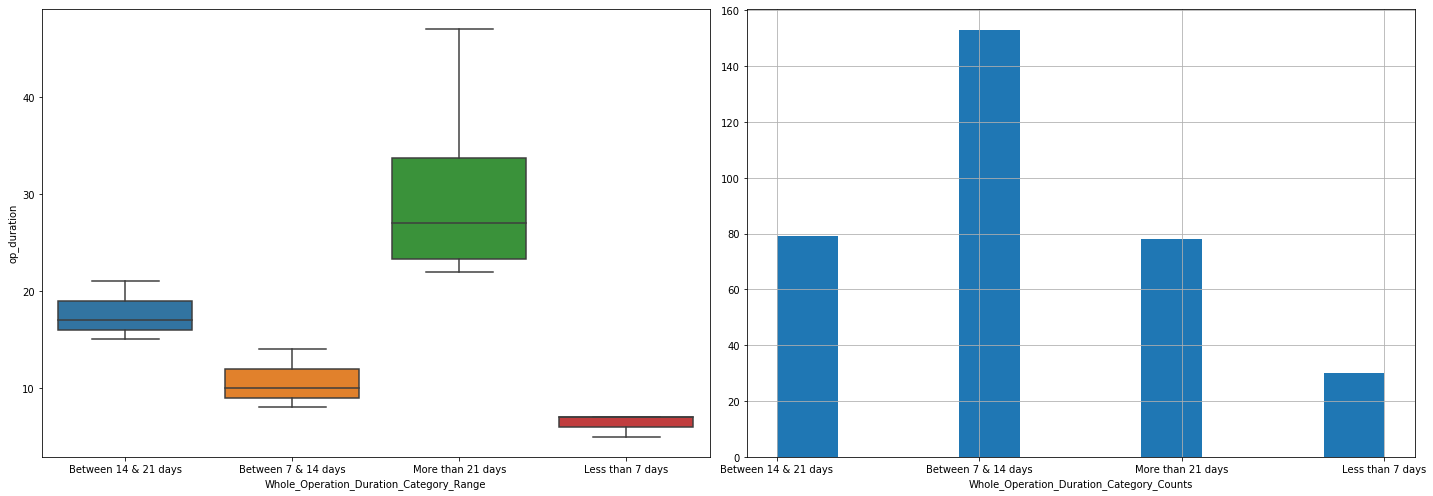

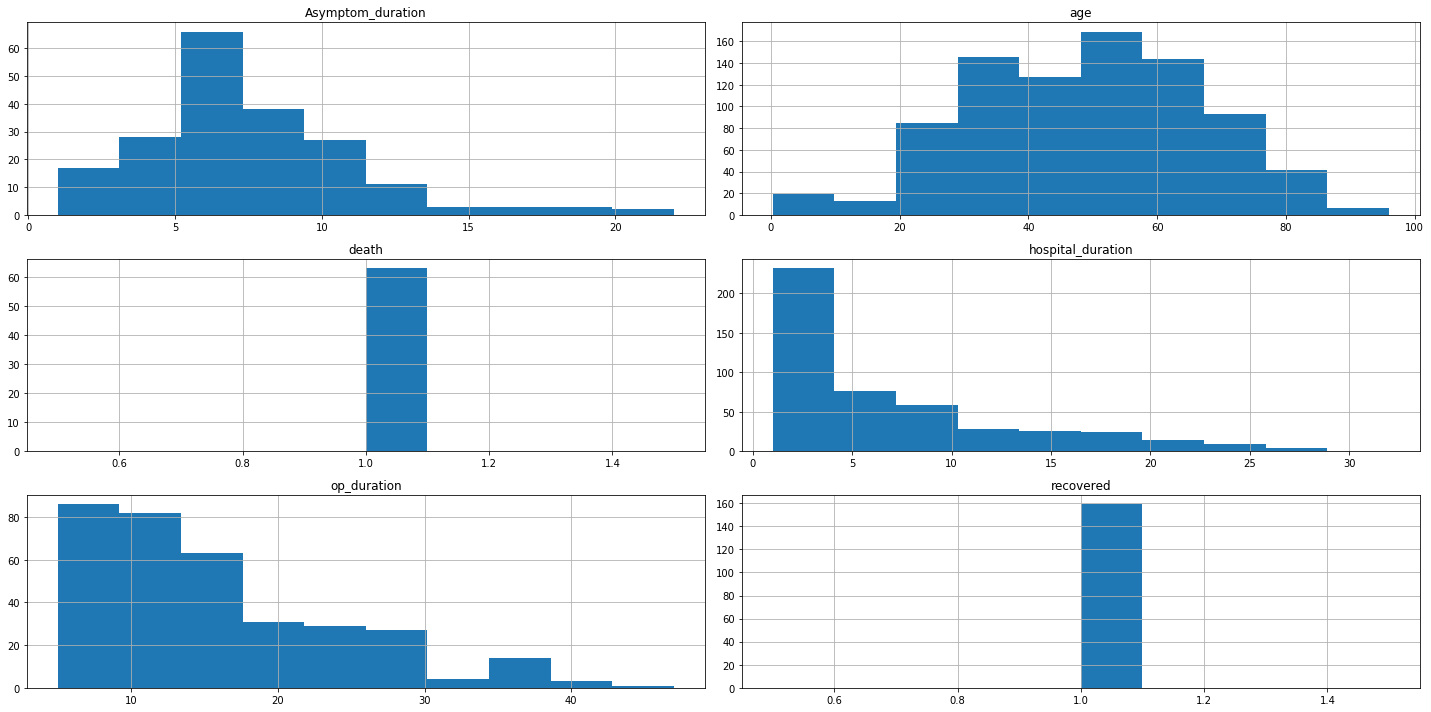

In [13]:
#print(data_d.columns)
# print('Median Asymptom duration is: %s days' % ((data_d['Asymptom_duration'][data_d['Asymptom_duration']>0])).median())
# print('Max Asymptom duration is: %s days' % ((data_d['Asymptom_duration'][data_d['Asymptom_duration']>0])).max())
# print('Median hospital duration is: %s days' % ((data_d['hospital_duration'][data_d['hospital_duration']>0])).median())
# print('Max hospital duration is: %s days' % ((data_d['hospital_duration'][data_d['hospital_duration']>0])).max())
# print('Median op duration is: %s days' % ((data_d['op_duration'][data_d['op_duration']>0])).median())
# print('Max op duration is: %s days' % ((data_d['op_duration'][data_d['op_duration']>0])).max())

data_d['gender'][data_d['gender']!='empty'].hist(bins=5,label='infected')
data_d['gender'][(data_d['gender']!='empty')& (data_d['death']==1)].hist(bins=5,label='Death')
display(HTML('<h3 style="text-align: center;font-weight: normal;"> <strong> Gender </strong> Statistics Count  </h3><p style="text-align: center;font-weight: normal;">****<strong><strong> More Spread and Death</strong> between Male than Female </strong>****</p>'))
plt.legend()
plt.yscale('log')
plt.ylim([0,1000])
plt.yticks([data_d['gender'][(data_d['gender']!='empty')& (data_d['death']==1)].value_counts()[0],data_d['gender'][data_d['gender']!='empty'].value_counts()[0]],[data_d['gender'][(data_d['gender']!='empty')& (data_d['death']==1)].value_counts()[0],data_d['gender'][data_d['gender']!='empty'].value_counts()[0]],rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

data_d['age_category'].hist(figsize=(15,3),label='Age_category Infection')
data_d['age_category'][data_d['death']==1].hist(figsize=(15,3), label='Age_category Deaths')
display(HTML('<h3 style="text-align: center;font-weight: normal;"> <strong> All ages </strong>are at risk of <strong> infection </strong> </h3><p style="text-align: center;font-weight: normal;">**** <strong>Most death are in elder ages</strong> ****</p>'))
plt.legend()
plt.yscale('log')
plt.ylim([0,1000])
plt.yticks([data_d['age_category'][data_d['death']==1].value_counts()[0],data_d['age_category'].value_counts()[0]],[data_d['age_category'][data_d['death']==1].value_counts()[0],data_d['age_category'].value_counts()[0]],rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

symptom['symptom'].hist(figsize=(15,5),bins=30,label='Symptoms per cases')
display(HTML('<h3 style="text-align: center;font-weight: normal;">  <strong>Symptom</strong> Statistics Count  </h3><p style="text-align: center;font-weight: normal;">**** <strong>Most cases symptoms include fever only, fever and cough then cough only</strong> ****</p>'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace = 1)
plt.subplot(1, 2, 1)
sns.boxplot(x=data_d['Asymptom_duration_cat'][data_d['Asymptom_duration_cat']!='empty'],y=data_d['Asymptom_duration']).set(xlabel='Asymptom_Duration_Category_Range')
plt.tight_layout()
plt.subplot(1, 2, 2)
data_d['Asymptom_duration_cat'][data_d['Asymptom_duration_cat']!='empty'].hist().set(xlabel='Asymptom_Duration_Category_Counts')
plt.tight_layout()
display(HTML('<h3 style="text-align: center;font-weight: normal;"><strong> Median Asymptom duration</strong> is: <strong>%s</strong> days, Max Asymptom duration may reach:  <strong>%s</strong> days </h3>'%(((data_d['Asymptom_duration'][data_d['Asymptom_duration']>0])).median(),((data_d['Asymptom_duration'][data_d['Asymptom_duration']>0])).max())))
plt.show()

plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace = 1)
plt.subplot(1, 2, 1)
sns.boxplot(x=data_d['hospital_duration_cat'][data_d['hospital_duration_cat']!='empty'],y=data_d['hospital_duration']).set(xlabel='Hospital_Duration_Category_Range')
plt.tight_layout()
plt.subplot(1, 2, 2)
data_d['hospital_duration_cat'][data_d['hospital_duration_cat']!='empty'].hist().set(xlabel='Hospital_Duration_Category_Counts')
plt.tight_layout()
display(HTML('<h3 style="text-align: center;font-weight: normal;"><strong> Median hospital duration</strong> is: <strong>%s</strong> days, Max hospital duration may reach: <strong>%s</strong> days </h3>'%(((data_d['hospital_duration'][data_d['hospital_duration']>0])).median(),((data_d['hospital_duration'][data_d['hospital_duration']>0])).max())))
plt.show()

plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace = 1)
plt.subplot(1, 2, 1)
sns.boxplot(x=data_d['op_duration_cat'][data_d['op_duration_cat']!='empty'],y=data_d['op_duration']).set(xlabel='Whole_Operation_Duration_Category_Range')
plt.tight_layout()
plt.subplot(1, 2, 2)
data_d['op_duration_cat'][data_d['op_duration_cat']!='empty'].hist().set(xlabel='Whole_Operation_Duration_Category_Counts')
plt.tight_layout()
display(HTML('<h3 style="text-align: center;font-weight: normal;"><strong> Median duration </strong>since infected to fully recovered/death is: <strong>%s</strong> days, Max may reach: <strong>%s</strong> days </h3>'%(((data_d['op_duration'][data_d['op_duration']>0])).median(),((data_d['op_duration'][data_d['op_duration']>0])).max())))
plt.show()

display(HTML('<h3 style="text-align: center;font-weight: normal;"> Histogram Charts for: age, death, recovered, Asymptom_duration, hospital_duration, op_duration </h3>'))
data_d[['age','death','recovered','Asymptom_duration','hospital_duration','op_duration']][data_d[['age','death','recovered','Asymptom_duration','hospital_duration','op_duration']]>0].hist(figsize=(20,10))
plt.tight_layout()
plt.show()


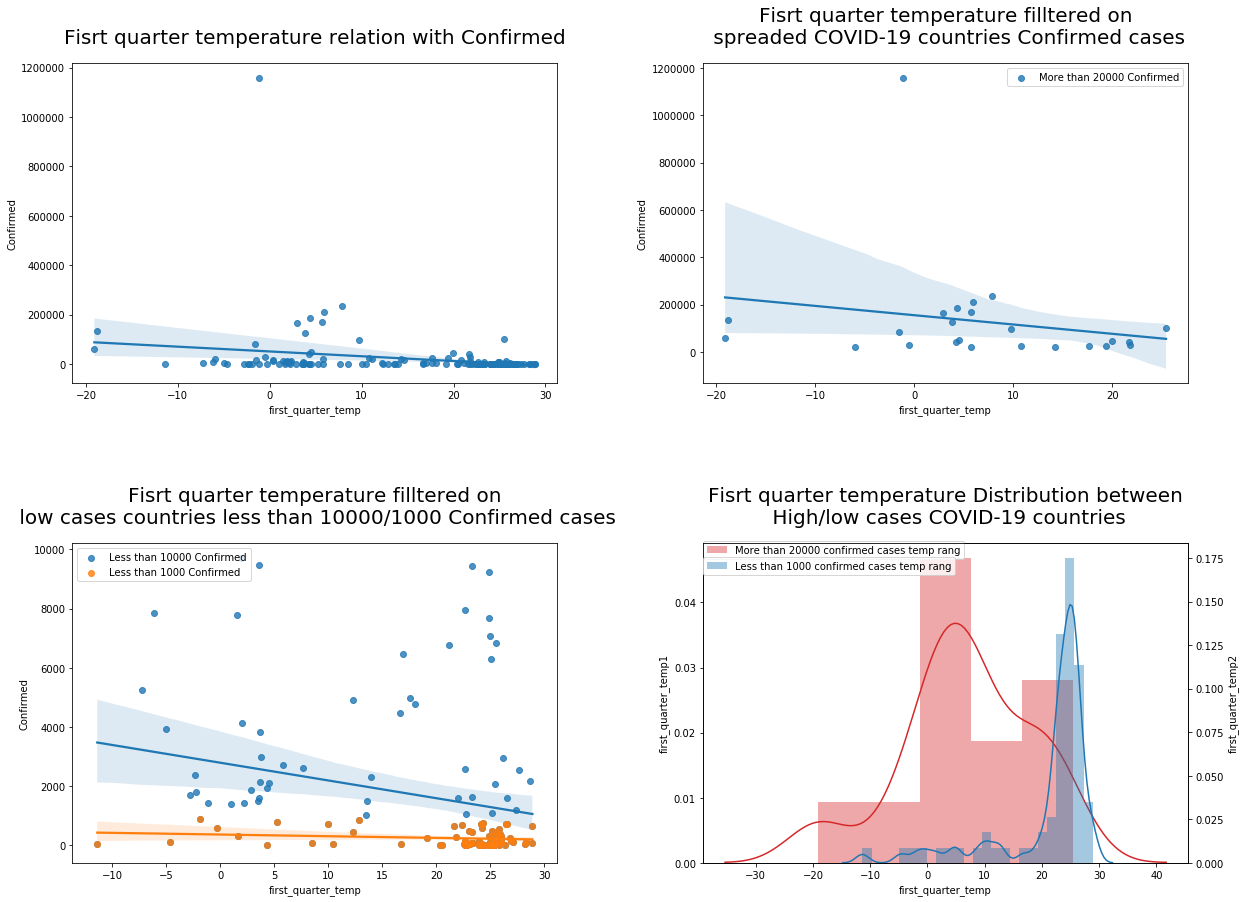

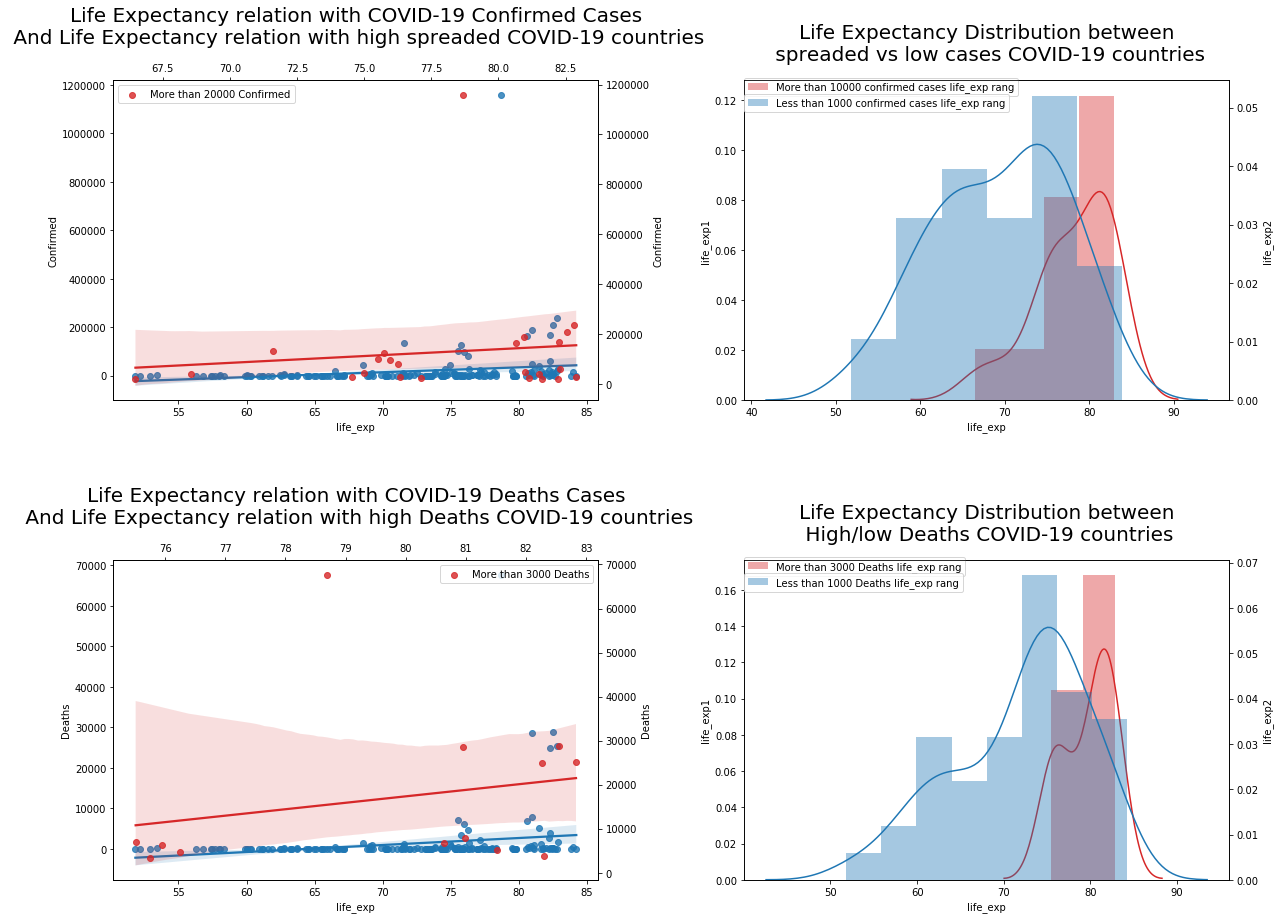

In [14]:
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace = 0.5,wspace=0.3)
plt.subplot(6, 2, 1)
display(HTML('<h3 style="text-align: center;font-weight: normal;">========<strong> COVID-19</strong> Shows <strong>Strong spread</strong> relation with <strong>Temperature </strong>==========</h3><p style="text-align: center;font-weight: normal;">1- <strong>Less than 10 celsius degree</strong> Temperature Avgerage(1st-year-quarter(1st-4-months)) for all <strong>High COVID-19 spread</strong> Countries (more than 20000 cases) - one irregular value in Brazil were no cureflew or social distances procedures applied  <br><br>2- <strong>More than 18 celsius degree</strong> Temperature Avgerage(1st-year-quarter(1st-4-months)) for <strong>85% of countries with low COVID-19 spread</strong> (less than 1000 confirmed cases)<br> <br> </p>'))
sns.regplot(x='first_quarter_temp', y='Confirmed', data=data_c_p[(data_c_p['first_quarter_temp']!=0)], fit_reg=True)
plt.title('Fisrt quarter temperature relation with Confirmed', fontsize=20,pad=20)
plt.subplot(6, 2, 2)
sns.regplot(x='first_quarter_temp', y='Confirmed', data=data_c_p[(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']>20000)&(data_c_p['Confirmed']!=0)], fit_reg=True,label='More than 20000 Confirmed')
plt.title('Fisrt quarter temperature filltered on\n spreaded COVID-19 countries Confirmed cases', fontsize=20,pad=20)
plt.legend()
plt.subplot(6, 2, 3)
sns.regplot(x='first_quarter_temp', y='Confirmed', data=data_c_p[(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']<10000)&(data_c_p['Confirmed']!=0)], fit_reg=True,label='Less than 10000 Confirmed')
sns.regplot(x='first_quarter_temp', y='Confirmed', data=data_c_p[(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']<1000)&(data_c_p['Confirmed']!=0)], fit_reg=True,label='Less than 1000 Confirmed')
plt.title('Fisrt quarter temperature filltered on\n low cases countries less than 10000/1000 Confirmed cases', fontsize=20,pad=20)
plt.legend()
plt.subplot(6, 2, 4)
sns.distplot(data_c_p['first_quarter_temp'][(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']>20000)&(data_c_p['Confirmed']!=0)],label='More than 20000 confirmed cases temp rang',color='tab:red',kde=True)
plt.ylabel('first_quarter_temp1')
plt.legend(loc=(0,0.95))
plt.twinx()
sns.distplot(data_c_p['first_quarter_temp'][(data_c_p['first_quarter_temp']!=0)&(data_c_p['Confirmed']<1000)&(data_c_p['Confirmed']!=0)],label='Less than 1000 confirmed cases temp rang',kde=True)
plt.title('Fisrt quarter temperature Distribution between\n High/low cases COVID-19 countries', fontsize=20,pad=20)
plt.ylabel('first_quarter_temp2')
plt.legend(loc=(0,0.9))
plt.show()
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace = 0.5,wspace=0.3)
plt.subplot(6, 2, 5)
display(HTML('<h3 style="text-align: center;font-weight: normal;"><br><br></h3>'))
display(HTML('<h3 style="text-align: center;font-weight: normal;">========<strong> COVID-19 </strong>Shows <strong>Strong spread/Deaths</strong> relation with <strong>Life Expectancy</strong> in Country </strong>==========</h3><p style="text-align: center;font-weight: normal;">1- All Countries with <strong>more than 3000 Deaths and High COVID-19 spread</strong> (more than 20000 cases) has <strong>76 and more years</strong> of Life Expectency  <br><br>2- Countries with <strong>low Deaths(less than 3000) and low COVID-19 spread</strong> (less than 20000 cases) has <strong>75 and less years</strong> of Life Expectency <br> <br></p>'))
sns.regplot(x='life_exp', y='Confirmed', data=data_c_p[(data_c_p['life_exp']!=0)], fit_reg=True)
plt.title('Life Expectancy relation with COVID-19 Confirmed Cases\n And Life Expectancy relation with high spreaded COVID-19 countries', fontsize=20,pad=20)
plt.twiny()
plt.twinx()
sns.regplot(x='life_exp', y='Confirmed', data=data_c_p[(data_c_p['life_exp']!=0)&(data_c_p['Confirmed']>20000)&(data_c_p['Confirmed']!=0)], fit_reg=True,label='More than 20000 Confirmed',color='tab:red')
plt.legend()
plt.subplot(6, 2, 6)
sns.distplot(data_c_p['life_exp'][(data_c_p['life_exp']!=0)&(data_c_p['Confirmed']>20000)&(data_c_p['Confirmed']!=0)],label='More than 10000 confirmed cases life_exp rang',color='tab:red',kde=True)
plt.ylabel('life_exp1')
plt.legend(loc=(0,0.95))
plt.twinx()
sns.distplot(data_c_p['life_exp'][(data_c_p['life_exp']!=0)&(data_c_p['Confirmed']<1000)&(data_c_p['Confirmed']!=0)],label='Less than 1000 confirmed cases life_exp rang',kde=True)
plt.title('Life Expectancy Distribution between\n spreaded vs low cases COVID-19 countries', fontsize=20,pad=20)
plt.ylabel('life_exp2')
plt.legend(loc=(0,0.9))
plt.subplot(6, 2, 7)
sns.regplot(x='life_exp', y='Deaths', data=data_c_p[(data_c_p['life_exp']!=0)], fit_reg=True)
plt.title('Life Expectancy relation with COVID-19 Deaths Cases\n And Life Expectancy relation with high Deaths COVID-19 countries', fontsize=20,pad=20)
plt.twiny()
plt.twinx()
sns.regplot(x='life_exp', y='Deaths', data=data_c_p[(data_c_p['life_exp']!=0)&(data_c_p['Deaths']>3000)&(data_c_p['Deaths']!=0)], fit_reg=True,label='More than 3000 Deaths',color='tab:red')
plt.legend()
plt.subplot(6, 2, 8)
sns.distplot(data_c_p['life_exp'][(data_c_p['life_exp']!=0)&(data_c_p['Deaths']>3000)&(data_c_p['Deaths']!=0)],label='More than 3000 Deaths life_exp rang',color='tab:red',kde=True)
plt.ylabel('life_exp1')
plt.legend(loc=(0,0.95))
plt.twinx()
sns.distplot(data_c_p['life_exp'][(data_c_p['life_exp']!=0)&(data_c_p['Deaths']<1000)&(data_c_p['Deaths']!=0)],label='Less than 1000 Deaths life_exp rang',kde=True)
plt.ylabel('life_exp2')
plt.legend(loc=(0,0.9))
plt.title('Life Expectancy Distribution between\n High/low Deaths COVID-19 countries', fontsize=20,pad=20)
plt.show()
#plt.figure(figsize=(20,50))
#plt.subplots_adjust(hspace = 0.5,wspace=0.3)
#plt.subplot(6, 2, 9)
#sns.regplot(x='population', y='Deaths', data=data_c_p[(data_c_p['population']>0) & (data_c_p['population']<1000000000)], fit_reg=True)
#plt.ylim(-10,500000)
#plt.title('population relation with Deaths with filtered less than bilions values', fontsize=20,pad=20)
#plt.subplot(6, 2, 10)
#sns.regplot(x='population', y='Deaths', data=data_c_p[(data_c_p['population']>0) & (data_c_p['population']<1000000000)], fit_reg=True)
#plt.ylim(-10,100000)
#plt.title('population relation with Deaths with filtered less than 100000 Death values', fontsize=20,pad=20)
#plt.subplot(6, 2, 11)
#sns.regplot(x='population', y='Confirmed', data=data_c_p[(data_c_p['population']>0) & (data_c_p['population']<1000000000)], fit_reg=True)
#plt.ylim(-10,500000)
#plt.title('population relation with Confirmed with filtered less than bilions values', fontsize=20,pad=20)
#plt.subplot(6, 2, 12)
#sns.regplot(x='population', y='Confirmed', data=data_c_p[(data_c_p['population']>0) & (data_c_p['population']<1000000000)], fit_reg=True)
##plt.ylim(-10,100000)
#plt.title(xs, fontsize=20,pad=20)
#plt.show()

In [45]:
#plt.loglog(data.index,data['Control_Level'])#.get_xaxis().set_visible(False)
#sns.regplot(x=data.index , y=growth_rate(data['Control_Level']), fit_reg=False)
(data_s['ObservationDate'].loc[data_s['ObservationDate'].index[-1]]+np.timedelta64(2, 'D')).date()
data = data_s[data_s['Country/Region']=='Kuwait'].groupby(['ObservationDate']).sum()
data['D+R_percentage_of_A']=((data['Deaths']+data['Recovered'])/data['Active'])*100
data['A_Divided_on_D+R']=data['Active']/(data['Deaths']+data['Recovered'])
data['A_Divided_on_D+R'] = ((data['A_Divided_on_D+R'][(data['A_Divided_on_D+R']<1000000)] -  data['A_Divided_on_D+R'].min()) / (data['A_Divided_on_D+R'][(data['A_Divided_on_D+R']<1000000)].max() - data['A_Divided_on_D+R'].min()))*100
data['Control_Level'] = ((((((data['Active'] - data['R+D'])-(data['Active'] - data['R+D']).min())/((data['Active'] - data['R+D']).max()-(data['Active'] - data['R+D']).min()))*100)-100)*(-1))
controled_level = np.round(data['Control_Level'].tail(n=14).describe()[1],1)
controled_level
np.round(data['Control_Level'].tail(n=3).describe()[1],1) - np.round(data['Control_Level'].tail(n=10).describe()[1],1) >= 0

False

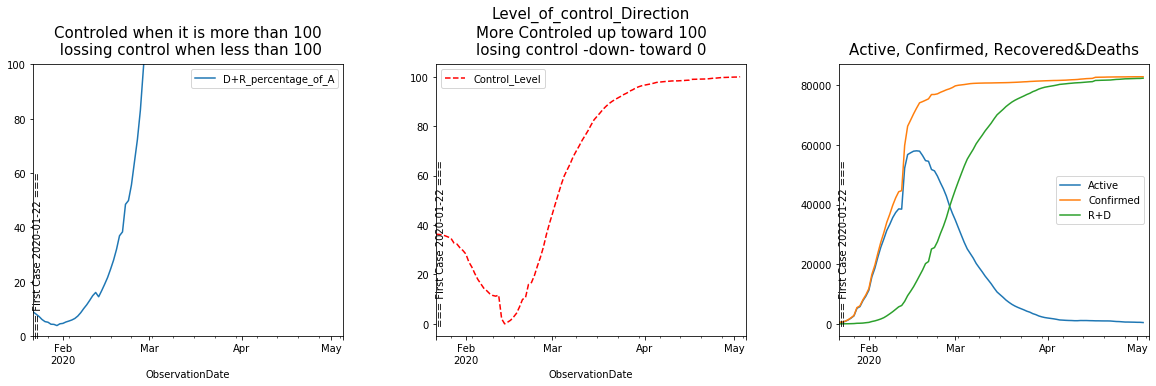

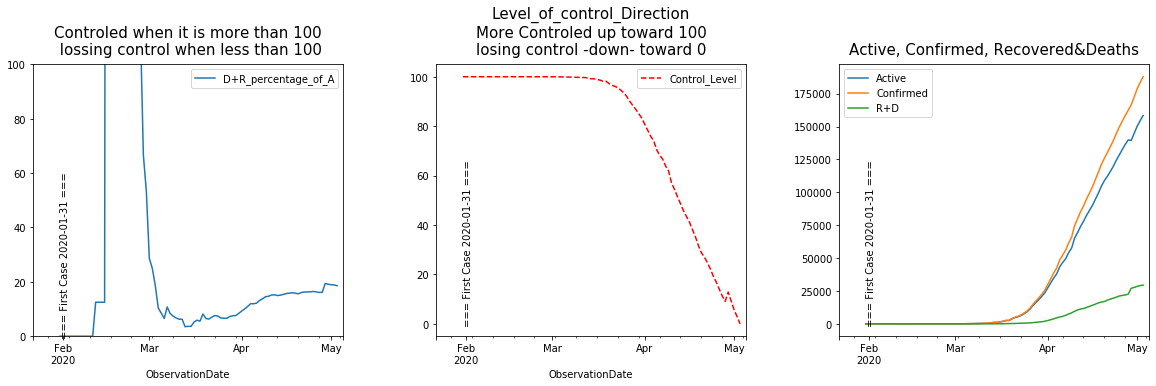

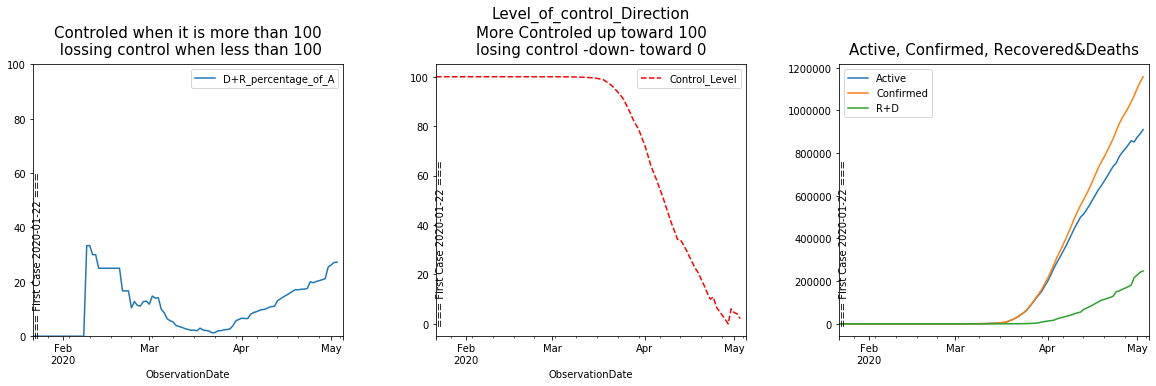

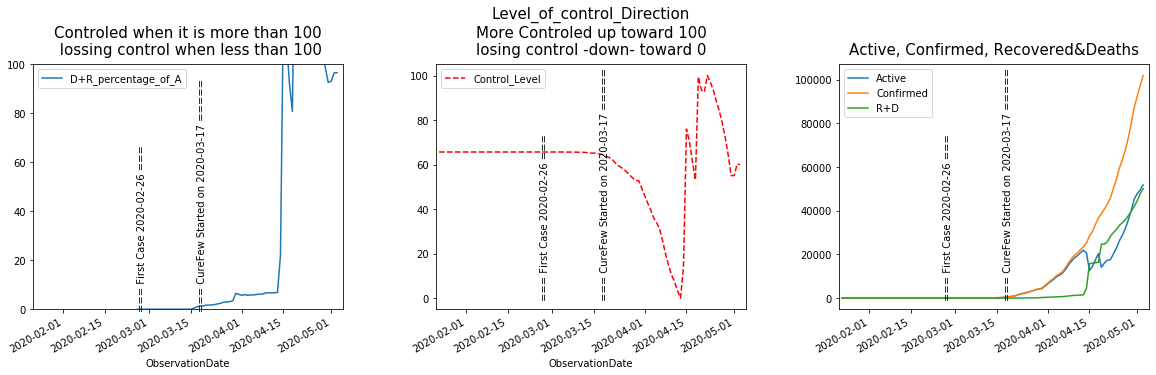

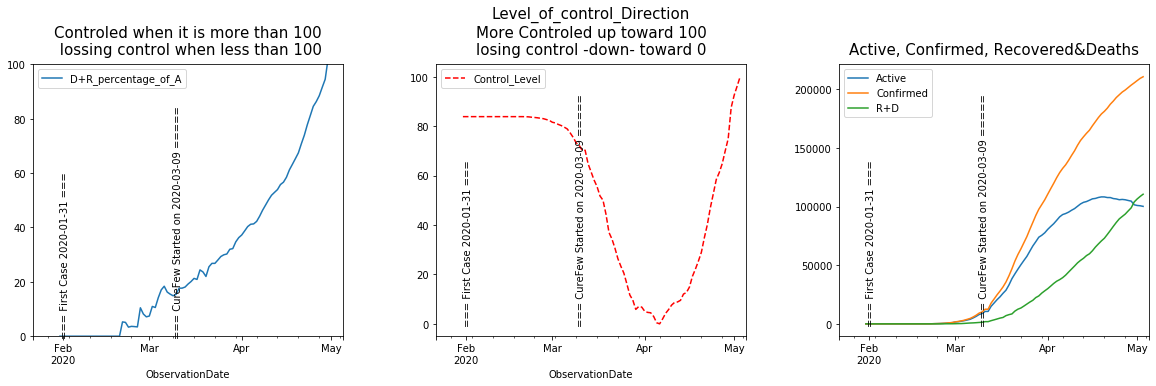

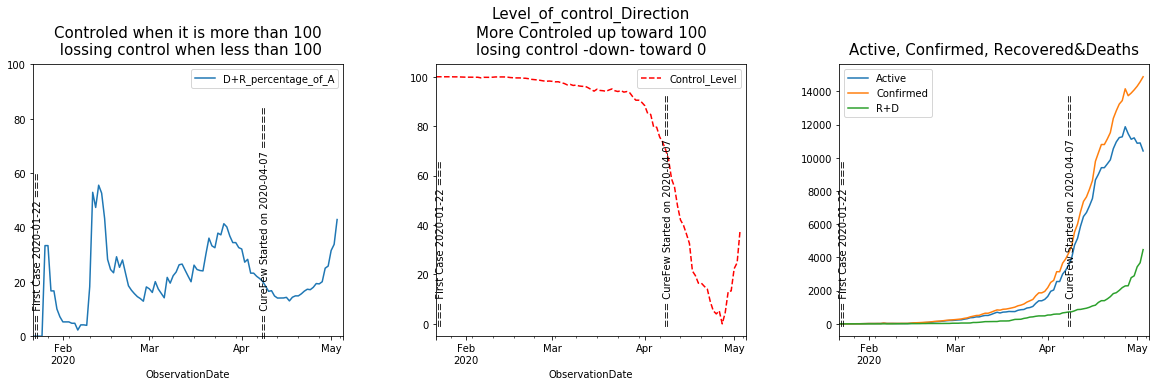

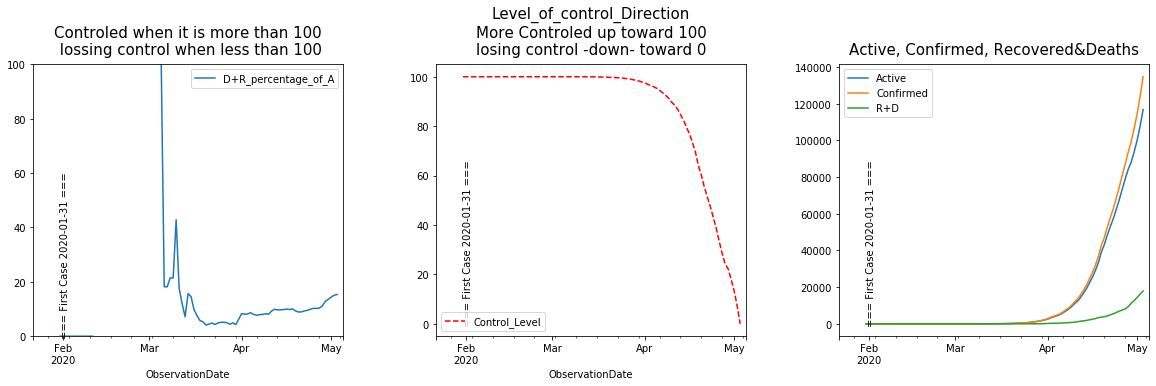

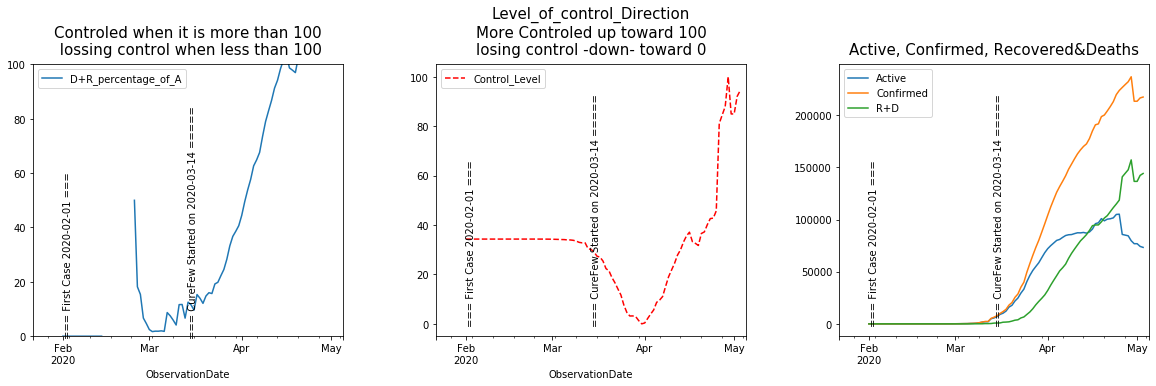

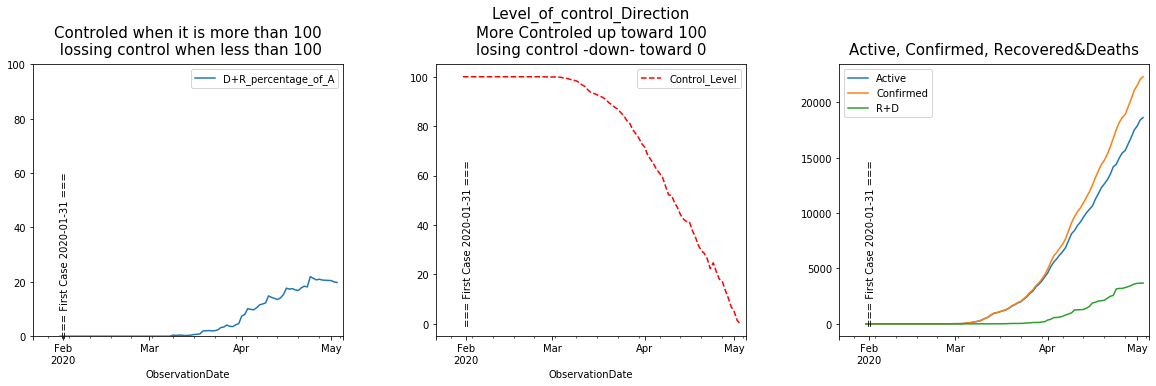

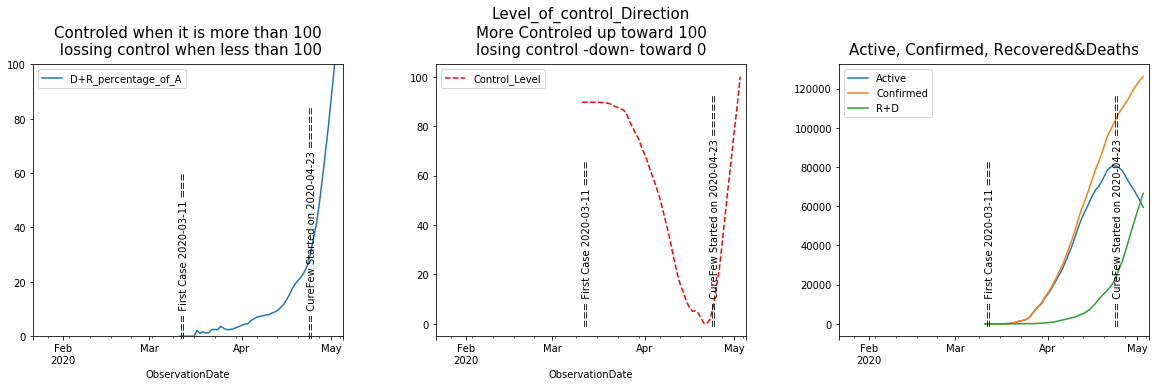

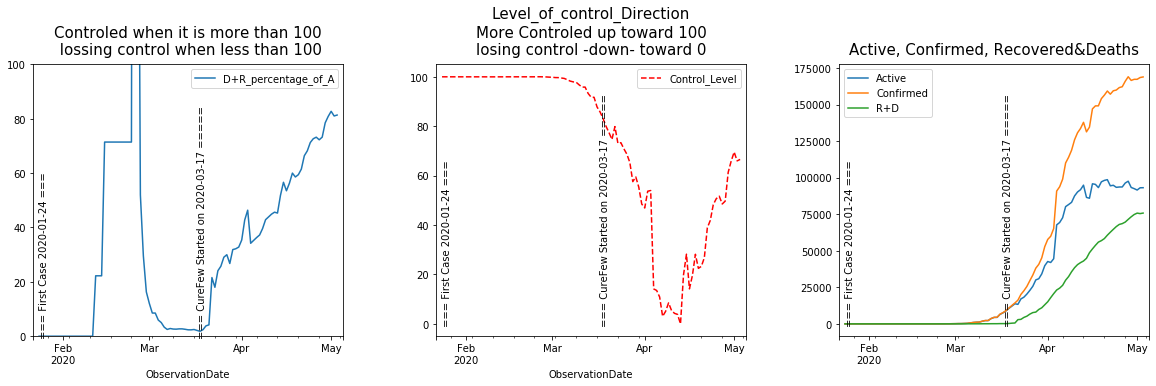

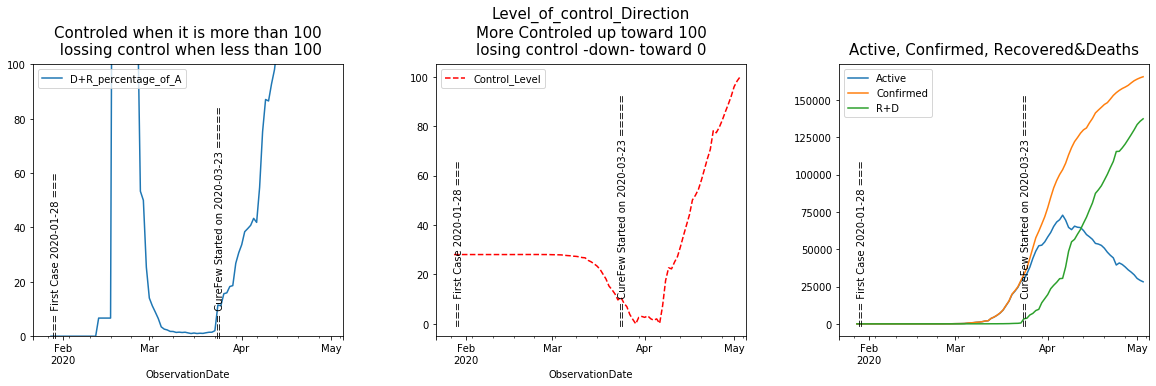

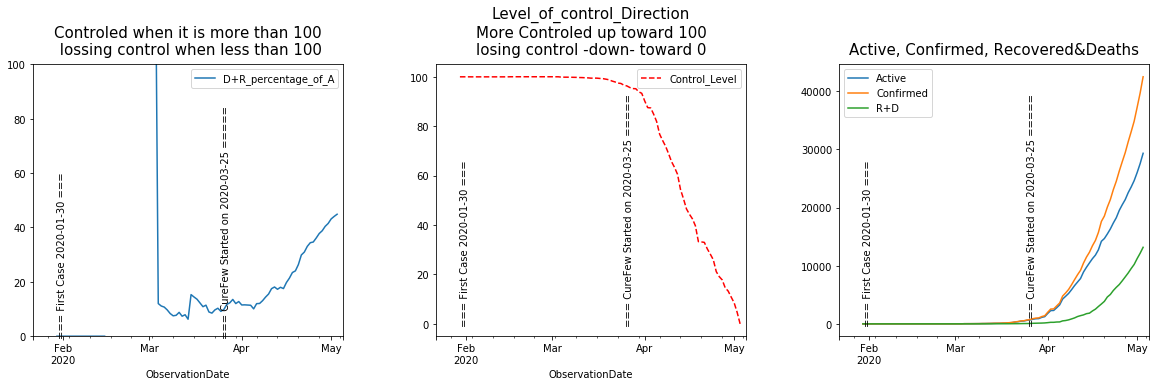

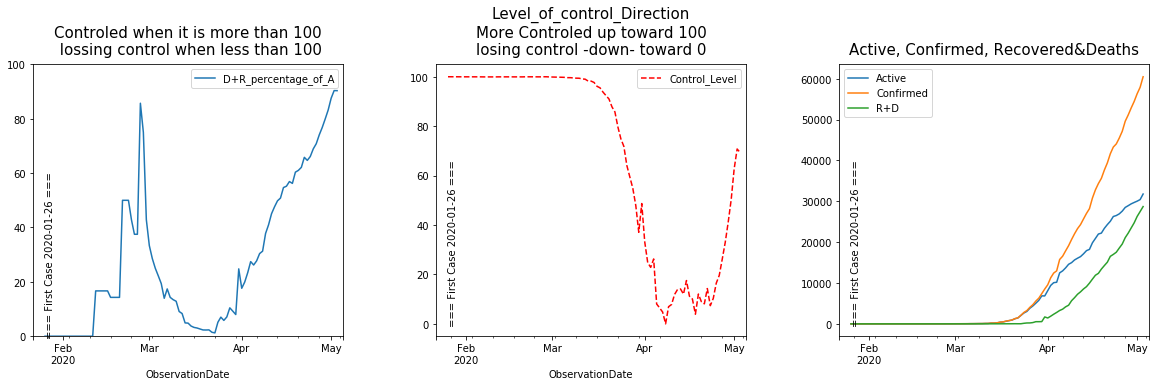

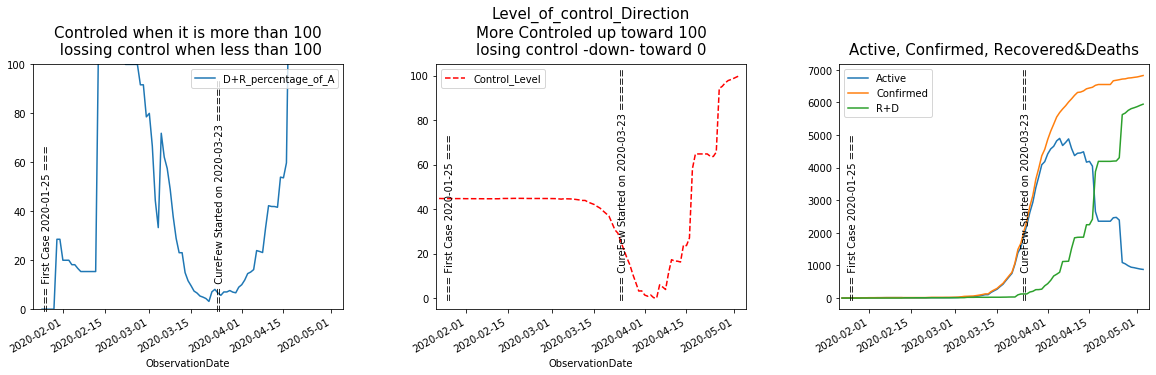

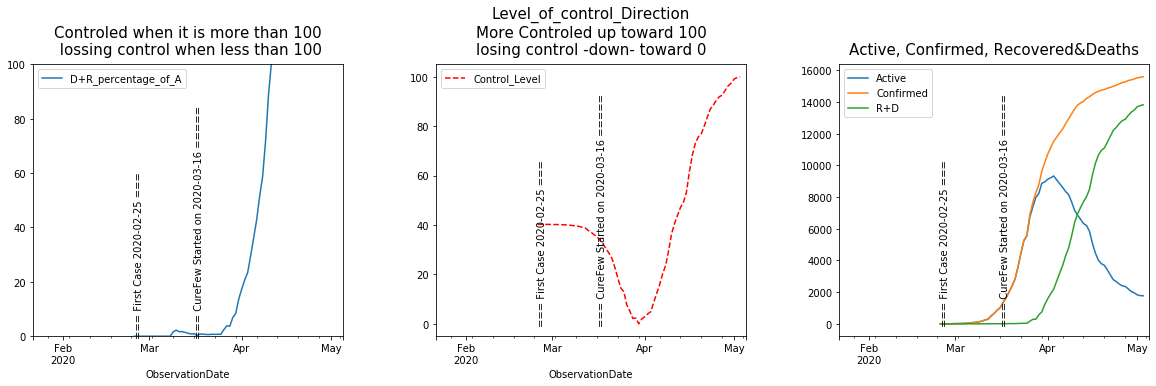

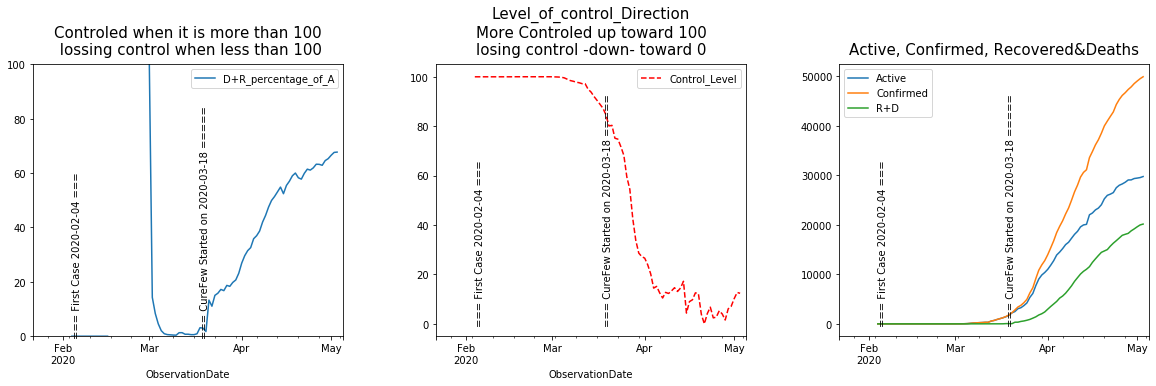

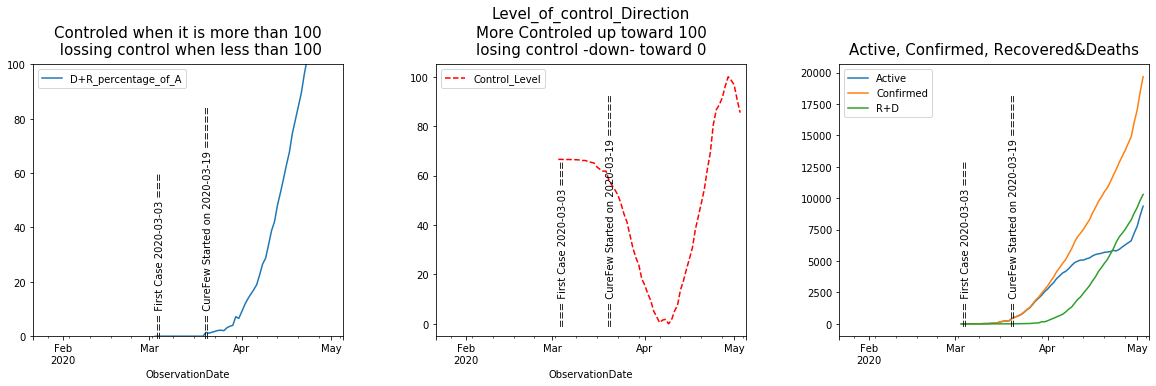

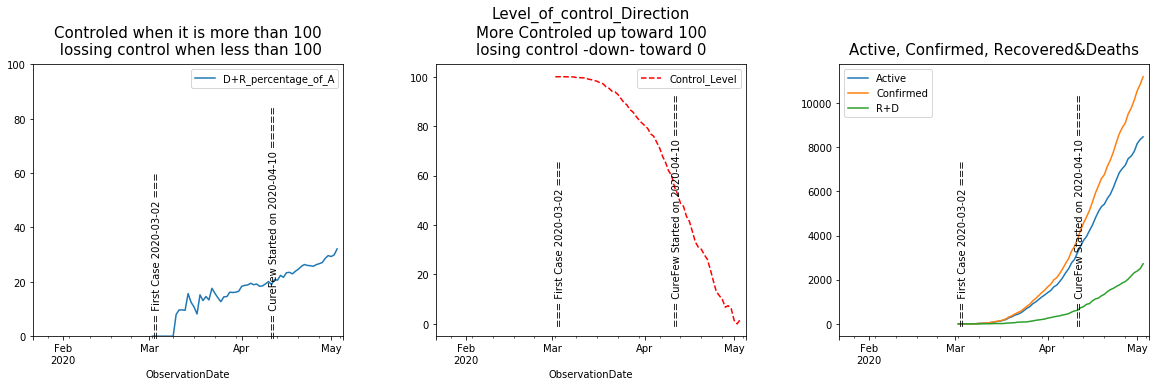

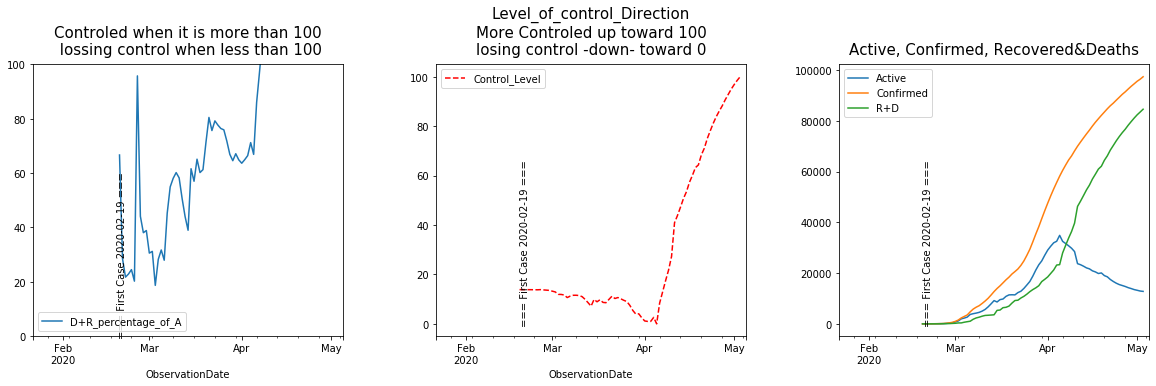

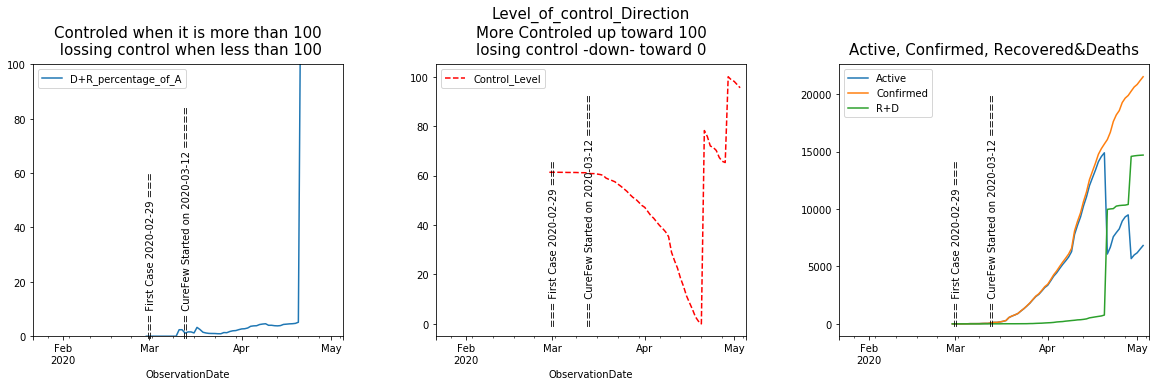

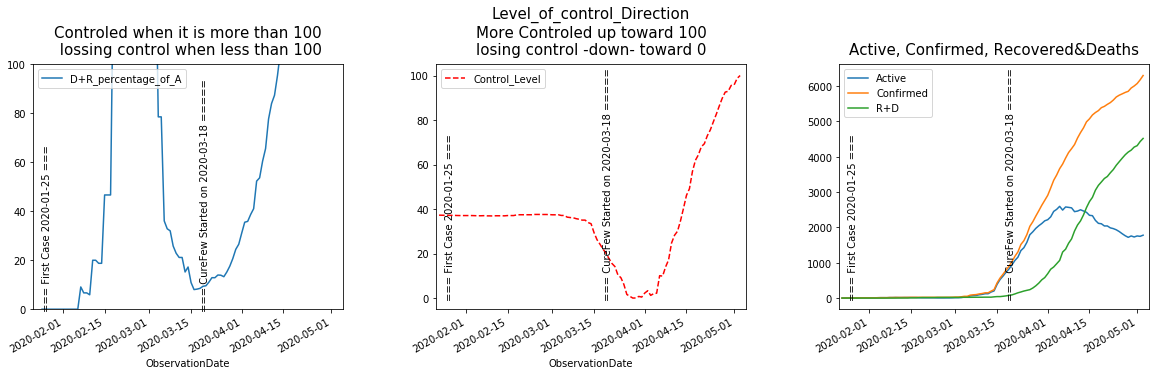

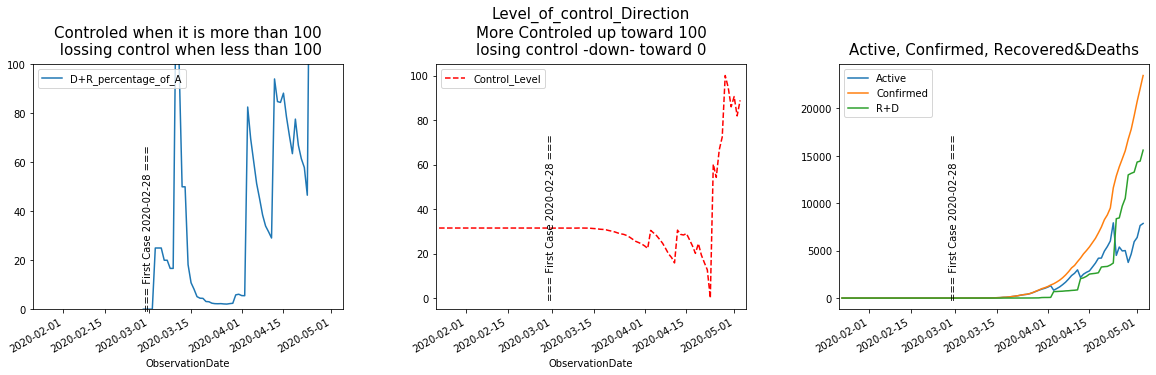

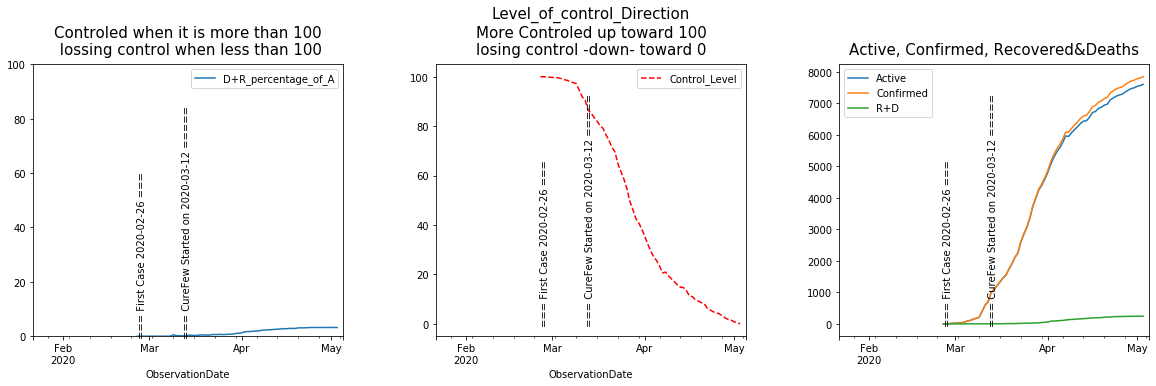

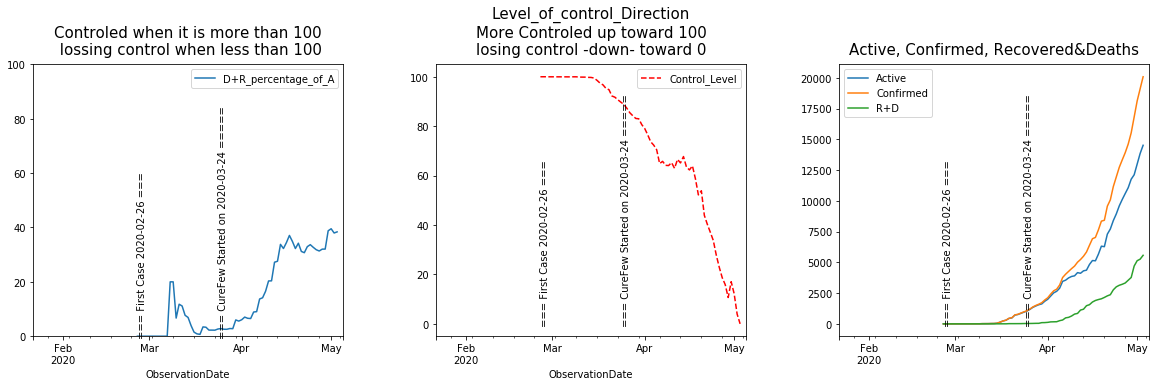

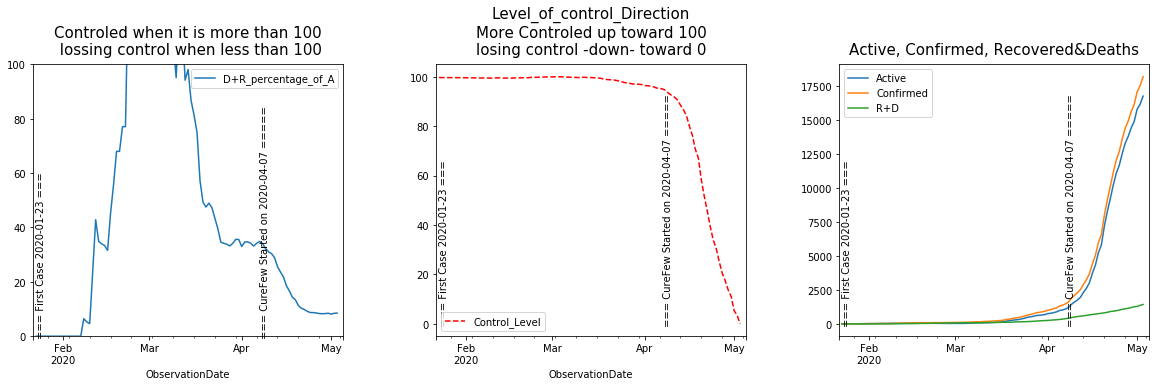

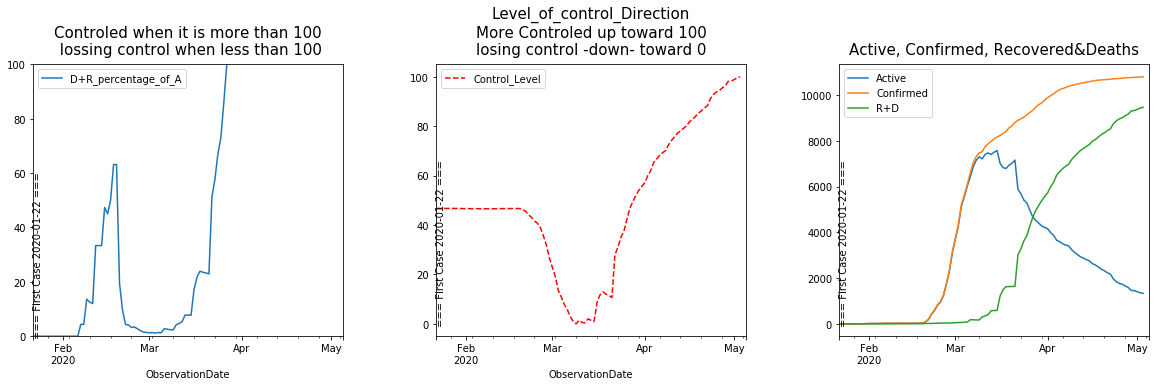

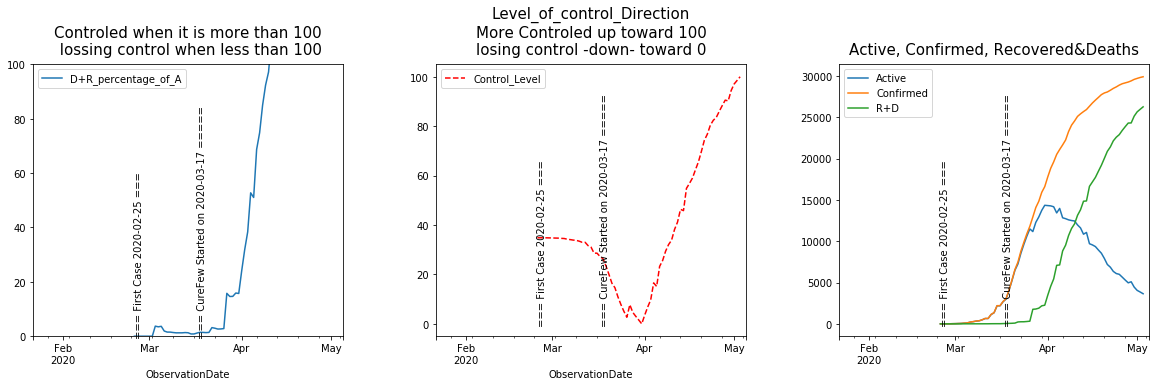

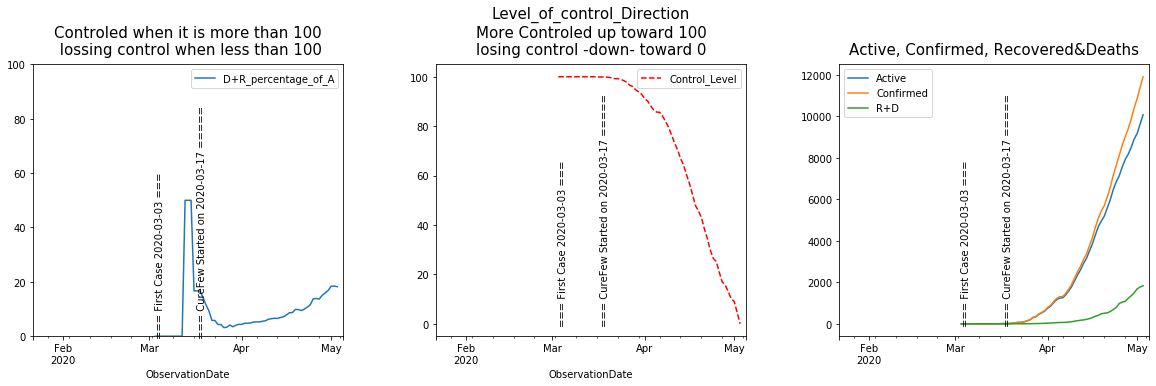

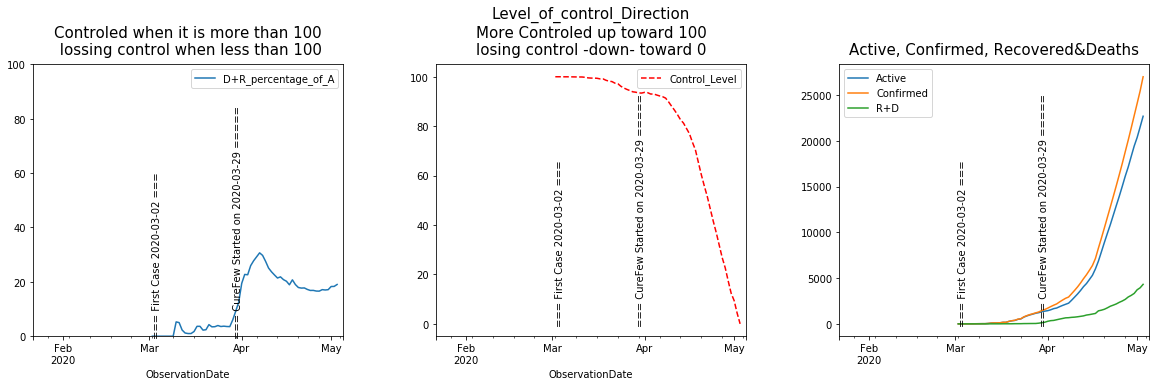

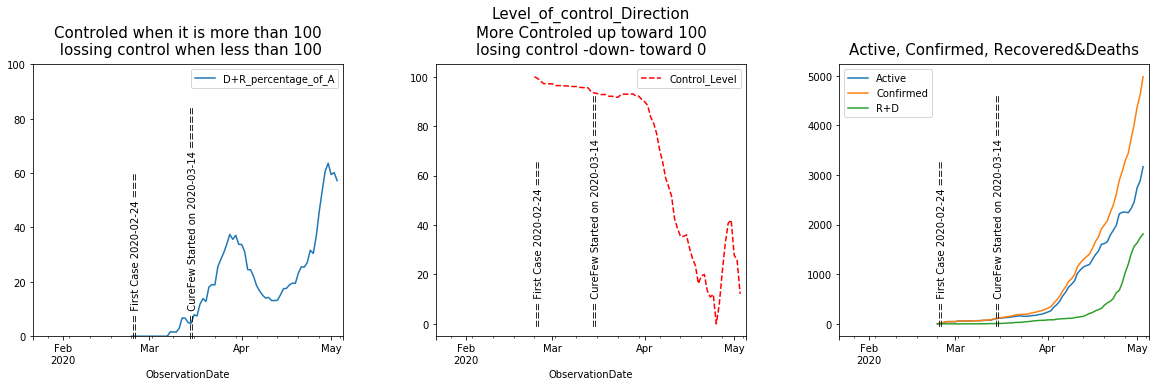

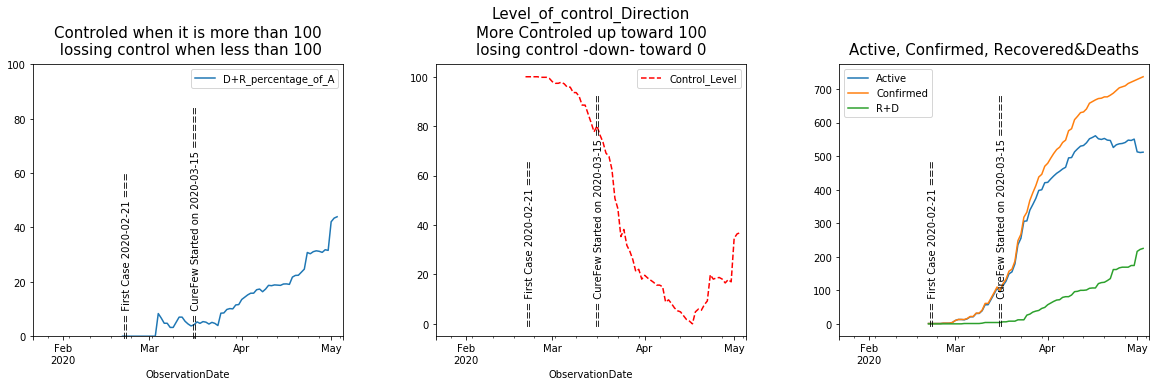

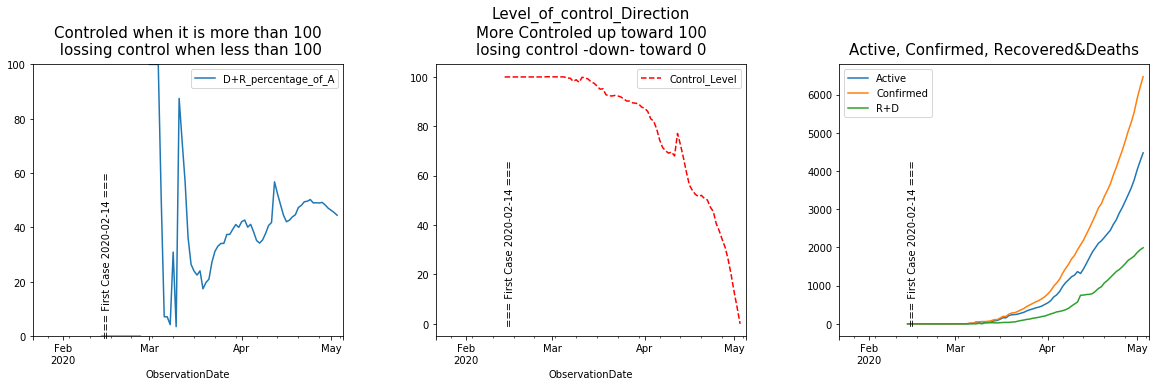

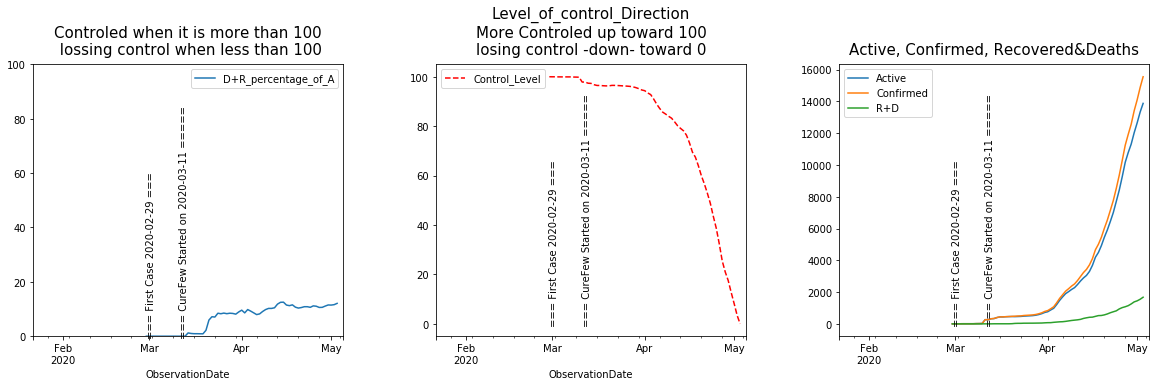

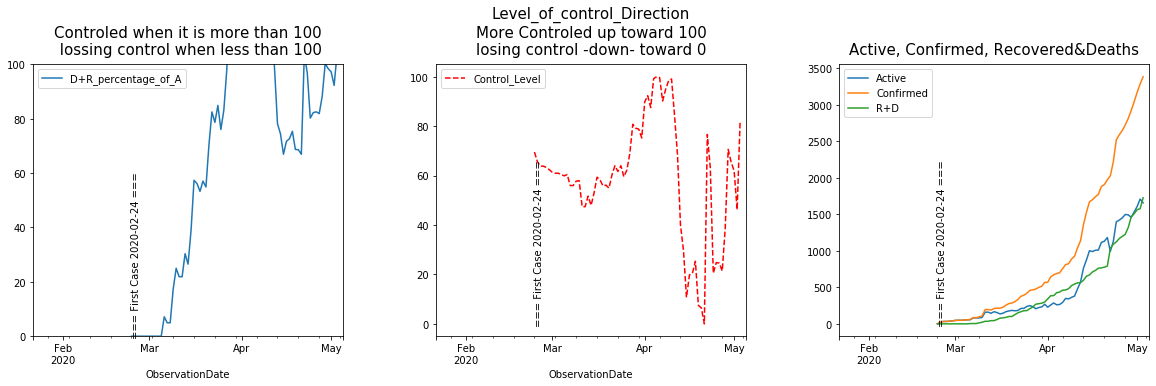

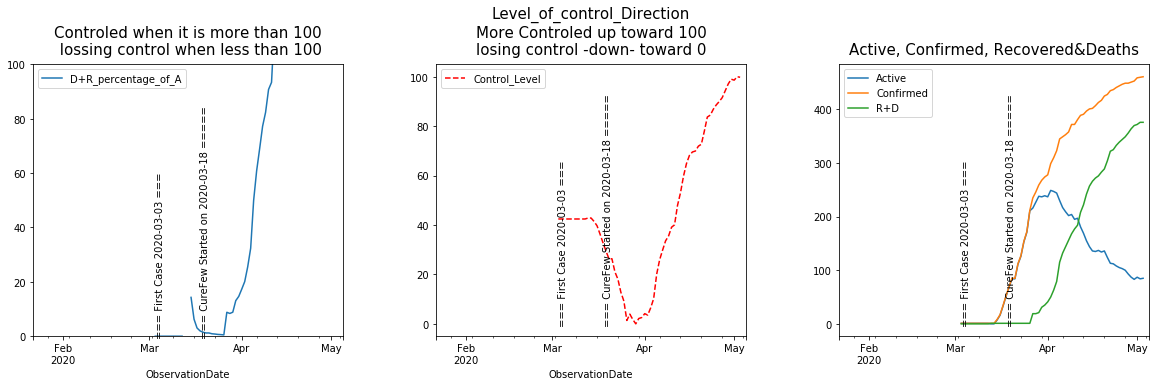

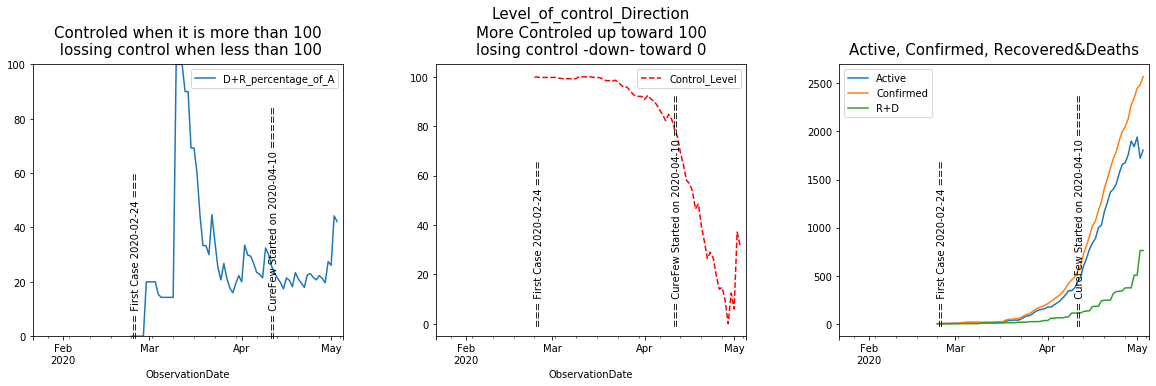

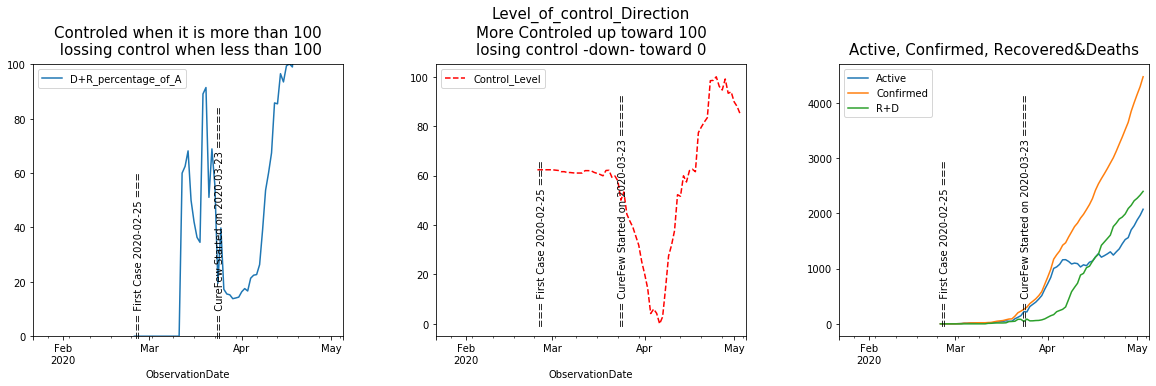

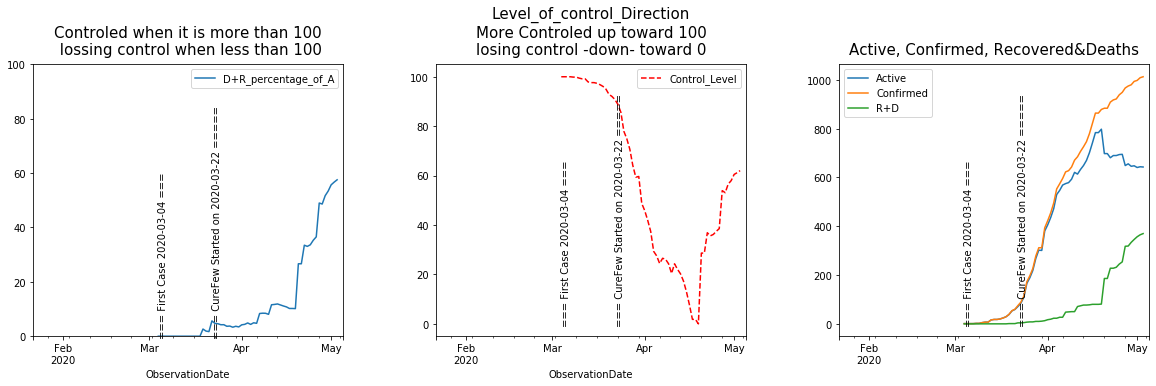

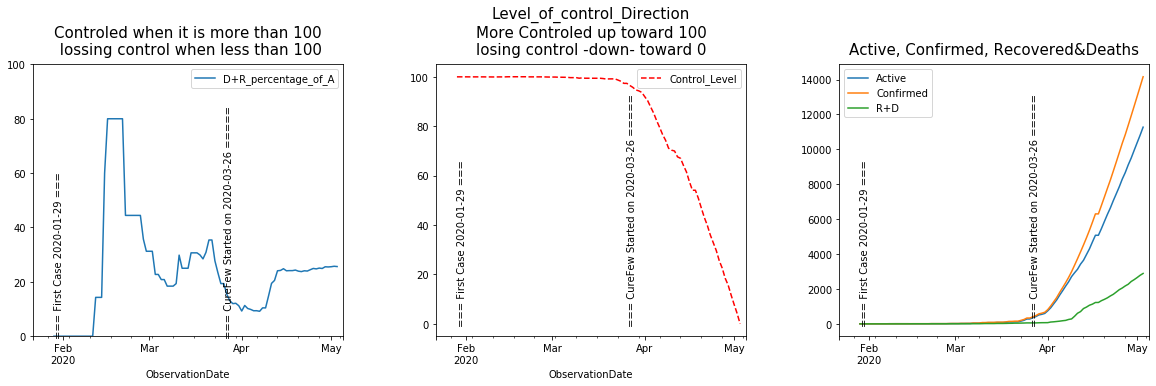

In [49]:
cols = ['D+R_percentage_of_A', 'Control_Level','Active']
main_countries = ['Mainland China', 'South Korea', 'Japan', 'Singapore', 'Germany', 'US', 'Spain', 'Iran', 'Italy', 'France', 'UK', 'Canada']
More_than_700Cases_Countires = ['Mainland China','UK', 'US', 'Brazil', 'Italy','Japan','Russia', 'Spain', 'Sweden','Turkey', 'France', 'Germany','India','Canada', 'Australia', 'Austria', 'Belgium', 'Chile', 'Indonesia', 'Iran', 'Ireland', 'Malaysia', 'Mexico','Norway', 'Pakistan','Singapore', 'South Korea', 'Switzerland', 'Ukraine','Saudi Arabia','Kuwait','Lebanon','Egypt','Qatar','Bahrain','Jordan','Oman','Algeria','Tunisia','United Arab Emirates']
Imp_countries = ['Mainland China', 'South Korea', 'Iran', 'Italy', 'Spain', 'Germany','Kuwait','Lebanon','France', 'US', 'Switzerland', 'UK', 'Austria','Belgium', 'Turkey', 'Canada', 'Israel', 'Sweden', 'Australia', 'Russia', 'India', 'Japan','Saudi Arabia','United Arab Emirates', 'Malaysia','Singapore','Qatar']

countries_countrol_level = pd.DataFrame(columns=['Country','Control_Level'])
countries_countrol_level['Country']=data_s[data_s['Confirmed']>700].groupby('Country/Region').max().reset_index(['Country/Region'])['Country/Region']

display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Summary: </strong> (more details on graphs below) <br><br></h3>'))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries Losing Control of the Outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(losing_control_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries Manage more Control of the Outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(more_control_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  ============= <br></h3>'))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries where the next Outbreak might be:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(next_possible_outbreak_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries Need to keep Control(current procedure) to dodge the outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(countries_near_controling)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#3480eb;">  <strong>Countries Manage to Control The out break (Flatten the curve) in current procedures:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br><br><br><br> </p>'%(countries_controled_the_outbreak)))

more_control_countries = []
losing_control_countries = []

for country in More_than_700Cases_Countires:
    data = data_s[data_s['Country/Region']==country].groupby(['ObservationDate']).sum()
    data['D+R_percentage_of_A']=((data['Deaths']+data['Recovered'])/data['Active'])*100
    data['A_Divided_on_D+R']=data['Active']/(data['Deaths']+data['Recovered'])
    data['A_Divided_on_D+R'] = ((data['A_Divided_on_D+R'][(data['A_Divided_on_D+R']<1000000)] -  data['A_Divided_on_D+R'].min()) / (data['A_Divided_on_D+R'][(data['A_Divided_on_D+R']<1000000)].max() - data['A_Divided_on_D+R'].min()))*100
    data['Control_Level'] = ((((((data['Active'] - data['R+D'])-(data['Active'] - data['R+D']).min())/((data['Active'] - data['R+D']).max()-(data['Active'] - data['R+D']).min()))*100)-100)*(-1))
    #data['growth_rate_of_control'] = growth_rate(data['Control_Level'])*100
    if data_c_p['Curefew_date'].loc[data_c_p['Country/Region']==country].values:
        Cdd = data_c_p['Curefew_date'].loc[data_c_p['Country/Region']==country].values[0]
        Cdd = pd.to_datetime(Cdd)
        datetime.datetime.timestamp(Cdd)
    else:
        Cdd = 0
    first_case = data['Confirmed'].ne(0).idxmax().date()
    if data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']<1000000)].max()>=100:
        first_controled_date = data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']>=100)&(data['D+R_percentage_of_A']<1000000)].index[0].date()
        #controled_level = 100.0
        if data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].max()>0:
            lose_control_date = data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].index[0].date()
            #controled_level = np.round(data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].describe()[-2],0)
            if data['D+R_percentage_of_A'].loc[lose_control_date:,][(data['D+R_percentage_of_A']>100)].max()>0:
                second_controled_date = data['D+R_percentage_of_A'].loc[lose_control_date:,][(data['D+R_percentage_of_A']>100)].index[0].date()
                #controled_level = 100.0
            else:
                second_controled_date = 'None'
        else:
            lose_control_date = 'Still under Control'
            second_controled_date = 'None'
    else:
        first_controled_date = 'Not yet'
        lose_control_date = 'None'
        second_controled_date = 'None'
        #controled_level = np.round((((data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']<1000000)]) / 100)*100).max(),0)
    controled_level = np.round(data['Control_Level'].tail(n=10).describe()[1],1)
    countries_countrol_level['Control_Level'][countries_countrol_level['Country']==country]=controled_level
    if np.round(data['Control_Level'].tail(n=3).describe()[1],1) - np.round(data['Control_Level'].tail(n=10).describe()[1],1) >= 0:
        control_direction = 'More Control'
        more_control_countries.append(country)
    else:
        control_direction = 'Losing Control'
        losing_control_countries.append(country)
        
    plt.figure(figsize=(20,5))
    plt.subplots_adjust(hspace = 0.5,wspace=0.3)
    display(HTML('<h3 style="text-align: center;font-weight: normal;"> ======== <strong>%s</strong> ======== Current status: <strong>%s</strong> ======== <br></h3><p style="text-align: center;font-weight: normal;"> First case on <strong>%s</strong>   &nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;    First Controled on: <strong>%s</strong>   &nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;  Lost Control on: <strong>%s</strong> <br>             Second controled on: <strong>%s</strong>     &nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;        Control level: <strong>%s%s</strong><br>&nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;        Current status: <strong>%s</strong><br> </p>'% (country,control_direction,first_case,first_controled_date,lose_control_date,second_controled_date,controled_level,'%',control_direction)))
    plt.tight_layout()
    for ix, column in enumerate(cols):
        plt.subplot(1, 3, ix+1)       
        if ix+1==3:
            data['Active'].plot()
            data['Confirmed'].plot()
            data['R+D'].plot()
            plt.xlabel('').set_visible(False)
            plt.title('Active, Confirmed, Recovered&Deaths', fontsize=15,pad=10)
            plt.legend()
        elif ix+1==2:
            #plt.setp(plt.subplot(1, 3, ix+1), ylim=(0, 110))
            data[column].plot(legend=True,style='r--')#.get_xaxis().set_visible(False)            
            plt.title('Level_of_control_Direction\nMore Controled up toward 100\nlosing control -down- toward 0', fontsize=15,pad=10)
        else:
            plt.setp(plt.subplot(1, 3, ix+1), ylim=(0, 100))
            data[column].plot(legend=True)#.get_xaxis().set_visible(False)
            plt.title('Controled when it is more than 100\n lossing control when less than 100', fontsize=15,pad=10)
        plt.setp(plt.subplot(1, 3, ix+1), xlim=(data_s['ObservationDate'][0].date(), (data_s['ObservationDate'].loc[data_s['ObservationDate'].index[-1]]+np.timedelta64(2, 'D')).date()))
        plt.text(first_case, 0, '=== First Case %s ==='%first_case,rotation=90,fontsize=10)
        if Cdd!=0:
            plt.text(Cdd.date(), 0, '=== CureFew Started on %s ====='%Cdd.date(),rotation=90,fontsize=10)
    plt.show()

In [48]:
countries_controled_the_outbreak = countries_countrol_level['Country'][countries_countrol_level['Control_Level']>=80].tolist()
countries_near_controling = countries_countrol_level['Country'][(countries_countrol_level['Control_Level']>40)&(countries_countrol_level['Control_Level']<80)].tolist()
next_possible_outbreak_countries = countries_countrol_level['Country'][countries_countrol_level['Control_Level']<=40].tolist()